<span style="color:red"><b>DISCLAIMER:</b></span> This is the resulting notebook. The one produced after many different trials. If some of the choices may seem strange, they have been driven by a deep analysis performed various times before the final deployment.

Import dependencies

In [1]:
from core_functions import *
from estimator_manager import EstimatorManager
from pandas import set_option
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

Load and inspect dataset.

In [2]:
df = pd.read_csv('data/auto_price.csv', sep=',')

In [3]:
df.head()

price MatriculationMonth  MatriculationYear        km     cv FuelType  \
0  15500             Luglio               2013   82914.0   85.0   Diesel   
1   3900           Novembre               2006  161038.0   75.0  Benzina   
2  15900             Giugno               2014  114830.0   80.0   Diesel   
3  54900             Maggio               2016   61700.0  183.0   Diesel   
4  45900          Settembre               2014   25790.0  190.0   Diesel   

         gearboxType Consume    city province          Brand     Model  \
0  Cambio automatico     4.1  Modena   Modena            BMW   Serie 1   
1     Cambio manuale     7.2  Modena   Modena     VOLKSWAGEN      Golf   
2     Cambio manuale     3.8  Modena   Modena  MERCEDES BENZ  Classe A   
3  Cambio automatico     5.9  Padova   Padova            BMW        X5   
4  Cambio automatico     6.2  Padova   Padova            BMW        X5   

                 Preparation  Engine  Seats  ConsumeFuel  ConsumeFuelNotUrban  \
0            116d 5p. Unique  1995.0    5.0          4.1                  3.6   
1   Golf 1.6 3p. Comfortline  1595.0    5.0          7.2                  5.6   
2            A 180 CDI Sport  1461.0    5.0          3.8                  3.3   
3  X5 xDrive30d 249CV Luxury  2993.0    5.0          5.9                  5.5   
4  X5 xDrive30d 258CV Luxury  2993.0    5.0          6.2                  5.7   

   Emissions   Color Metallizzato Airbag NumberDoors EmissionClass  \
0      109.0     NaN          NaN    NaN         NaN           NaN   
1      176.0     Blu          NaN    NaN         NaN           NaN   
2       98.0  Grigio          NaN    NaN         NaN           NaN   
3      156.0    Nero          NaN    NaN         NaN           NaN   
4      162.0  Grigio           Sì    NaN         NaN           NaN   

  AirConditioning Interior  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN

In [4]:
shape = df.shape
shape

(178248, 25)

In [5]:
types = df.dtypes
types

price                    int64
MatriculationMonth      object
MatriculationYear        int64
km                     float64
cv                     float64
FuelType                object
gearboxType             object
Consume                 object
city                    object
province                object
Brand                   object
Model                   object
Preparation             object
Engine                 float64
Seats                  float64
ConsumeFuel            float64
ConsumeFuelNotUrban    float64
Emissions              float64
Color                   object
Metallizzato            object
Airbag                  object
NumberDoors             object
EmissionClass           object
AirConditioning         object
Interior                object
dtype: object

Let's see if our columns are skewed.

In [6]:
df.skew()

price                   35.981924
MatriculationYear       -3.920694
km                     383.000708
cv                      64.482269
Engine                  14.108214
Seats                  284.683289
ConsumeFuel            244.767529
ConsumeFuelNotUrban    270.725925
Emissions                2.784388
dtype: float64

See some stats for numerical columns.

In [7]:
df.describe().transpose().round(2)

count      mean         std     min      25%      50%  \
price                178248.0  20262.17    25940.73   239.0   9400.0  15900.0   
MatriculationYear    178248.0   2012.97        7.24  1900.0   2011.0   2015.0   
km                   146756.0  85622.74  5605964.74     1.0  15000.0  57000.0   
cv                   166933.0     98.77       92.95     0.0     70.0     85.0   
Engine               169898.0   1709.33      764.43     1.0   1368.0   1598.0   
Seats                162098.0      6.17      403.93     1.0      5.0      5.0   
ConsumeFuel          123753.0      5.37       24.23     0.0      4.1      4.9   
ConsumeFuelNotUrban  124041.0      4.67       22.95     0.0      3.8      4.2   
Emissions            122810.0    130.22       38.58     0.0    108.0    119.0   

                          75%           max  
price                 24500.0  3.500000e+06  
MatriculationYear      2017.0  2.018000e+03  
km                   111825.0  2.147484e+09  
cv                      110.0  1.395000e+04  
Engine                 1995.0  9.640000e+04  
Seats                     5.0  1.150000e+05  
ConsumeFuel               5.8  6.000000e+03  
ConsumeFuelNotUrban       5.0  7.000000e+03  
Emissions               143.0  1.125000e+03

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178248 entries, 0 to 178247
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                178248 non-null  int64  
 1   MatriculationMonth   178248 non-null  object 
 2   MatriculationYear    178248 non-null  int64  
 3   km                   146756 non-null  float64
 4   cv                   166933 non-null  float64
 5   FuelType             177485 non-null  object 
 6   gearboxType          177121 non-null  object 
 7   Consume              131811 non-null  object 
 8   city                 178172 non-null  object 
 9   province             178172 non-null  object 
 10  Brand                178087 non-null  object 
 11  Model                178087 non-null  object 
 12  Preparation          178087 non-null  object 
 13  Engine               169898 non-null  float64
 14  Seats                162098 non-null  float64
 15  ConsumeFuel      

It is pretty strange that the feature 'Consume' is an Object and not a number. By looking deeper at the dataset, I have noticed that this feature is sometimes proposed as a float, and some other times as a string (e.g. 5.1l/100km). Additionally, it is also worth to say that it is not an estimate, but it contains the same value (the most of the time) of <b>only one</b> between the two columns 'ConsumeFuel' and 'ConsumeFuelNotUrban'.</br></br>
Seen this, I think I will prefer to drop one between these three columns. In order to decide which, I will first investigate deeper the data.

In [9]:
df.isna().sum()

price                      0
MatriculationMonth         0
MatriculationYear          0
km                     31492
cv                     11315
FuelType                 763
gearboxType             1127
Consume                46437
city                      76
province                  76
Brand                    161
Model                    161
Preparation              161
Engine                  8350
Seats                  16150
ConsumeFuel            54495
ConsumeFuelNotUrban    54207
Emissions              55438
Color                  15724
Metallizzato           97532
Airbag                 36584
NumberDoors            24650
EmissionClass          58351
AirConditioning        18010
Interior               98473
dtype: int64

We may find more informative the percentage of missing values, along with some plots showing the empty cells, as follows.

The percentage of missing values is the following: 

 price                   0.00
MatriculationMonth      0.00
MatriculationYear       0.00
km                     17.67
cv                      6.35
FuelType                0.43
gearboxType             0.63
Consume                26.05
city                    0.04
province                0.04
Brand                   0.09
Model                   0.09
Preparation             0.09
Engine                  4.68
Seats                   9.06
ConsumeFuel            30.57
ConsumeFuelNotUrban    30.41
Emissions              31.10
Color                   8.82
Metallizzato           54.72
Airbag                 20.52
NumberDoors            13.83
EmissionClass          32.74
AirConditioning        10.10
Interior               55.24
dtype: float64 


This is the matrix showing missing values for each column: 



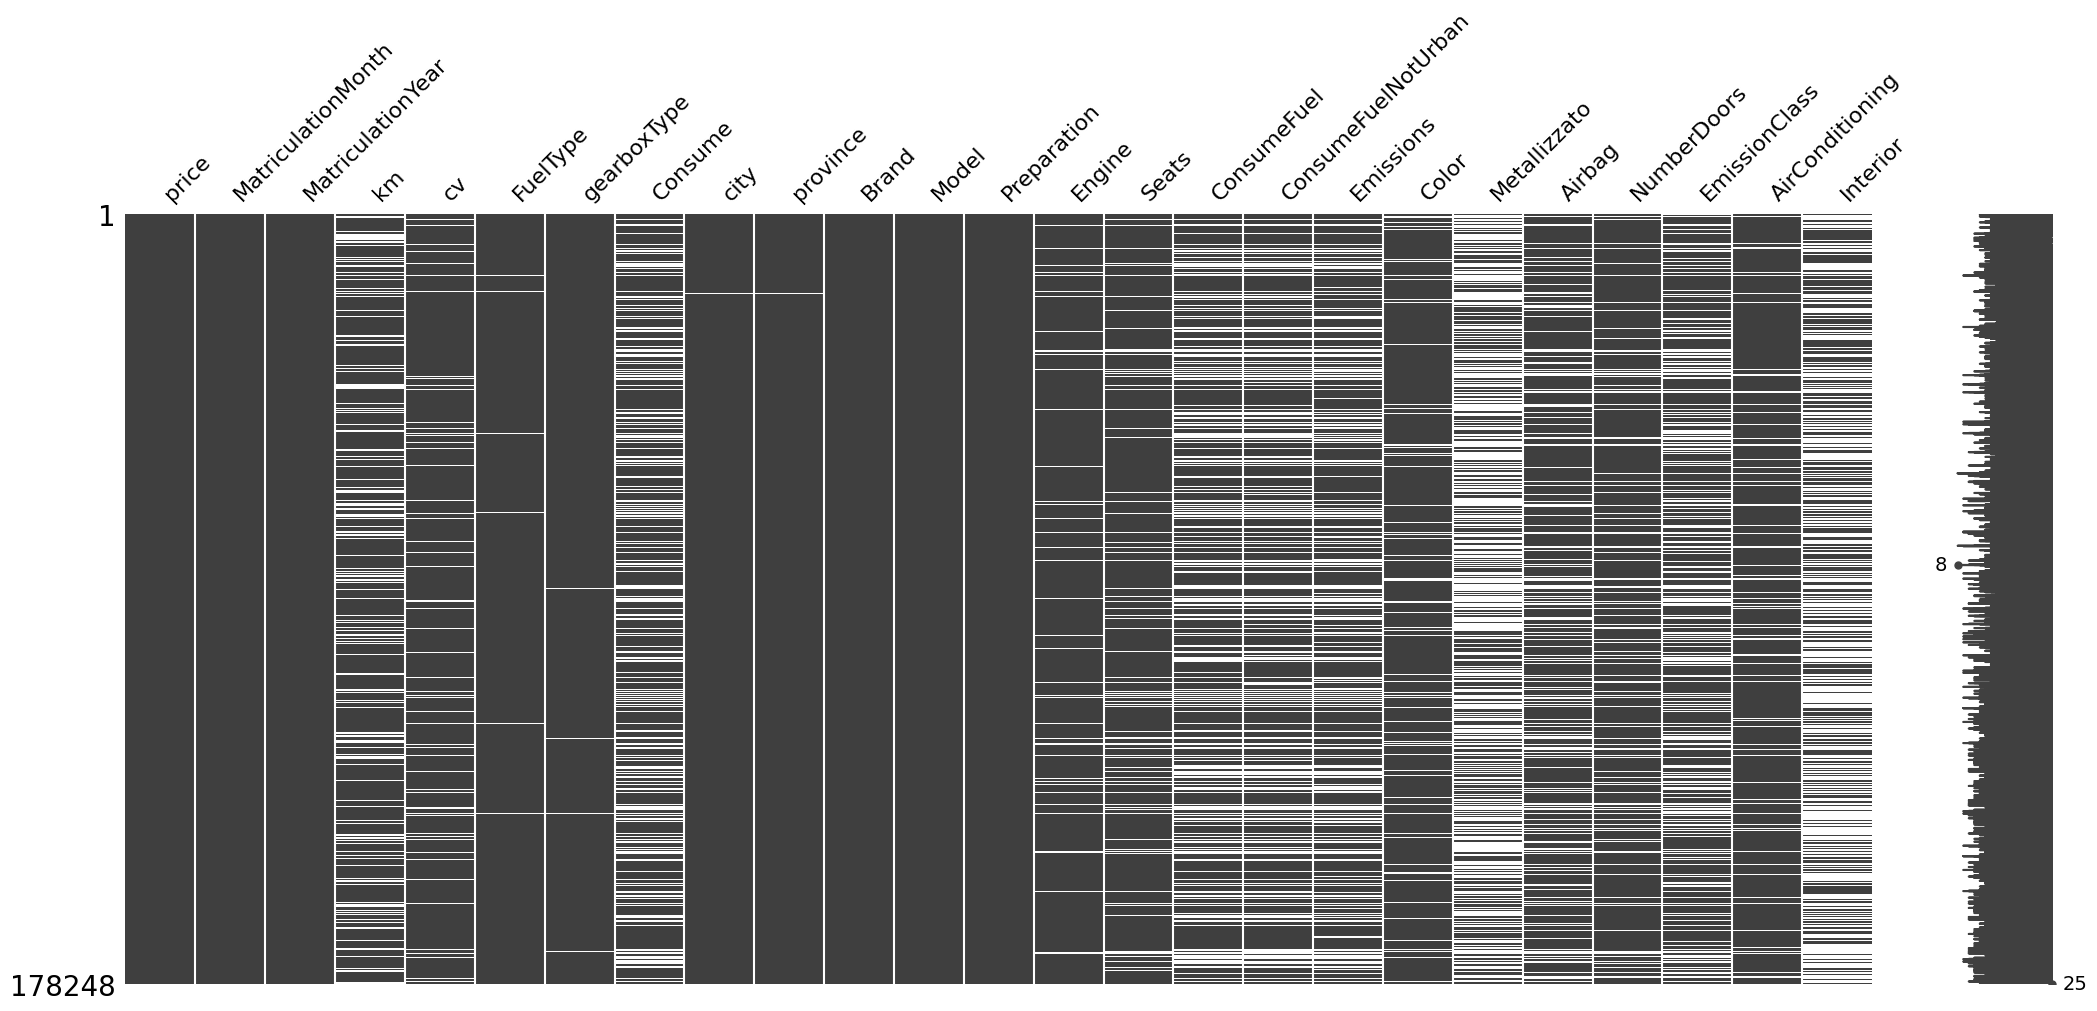

This is the barplot showing the amount of filled values for each column: 



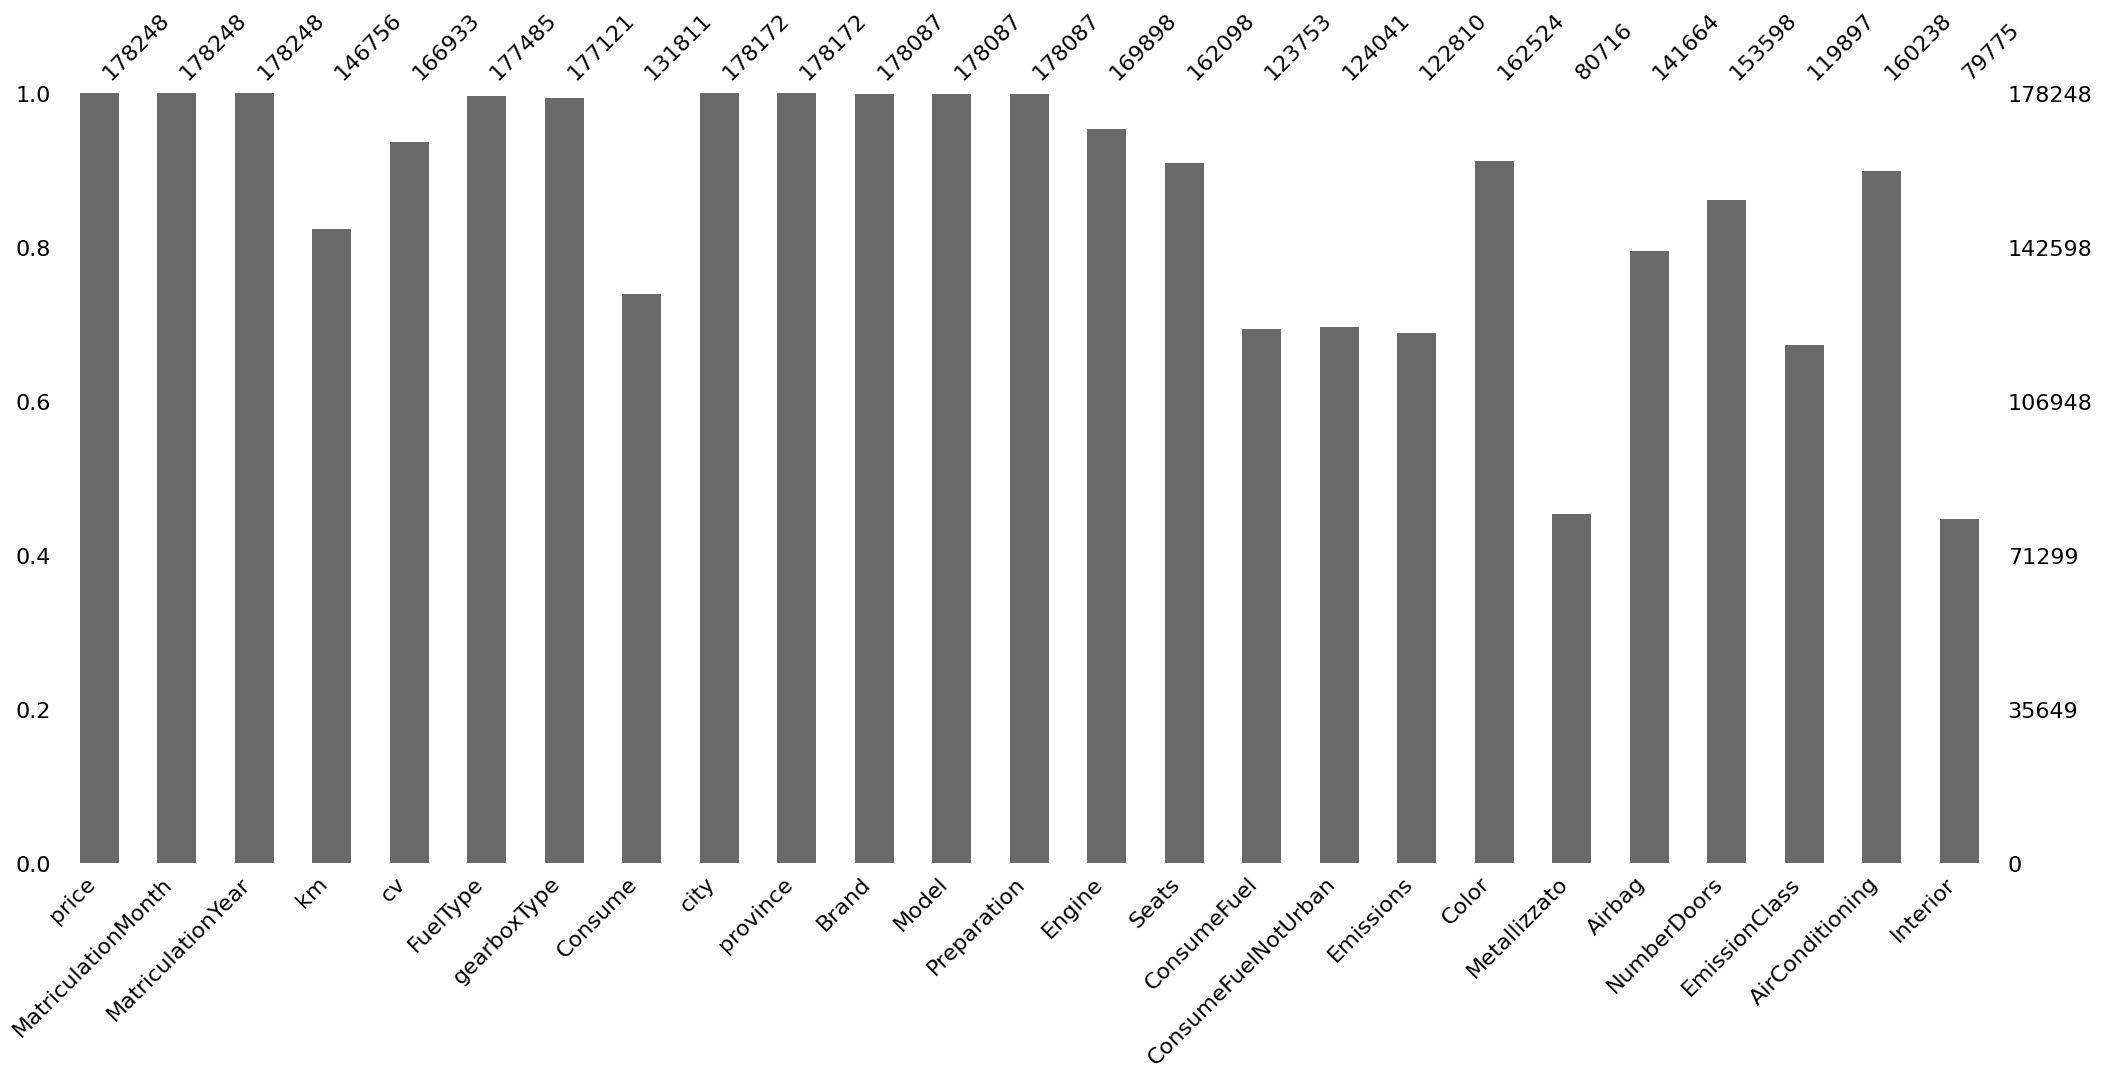

In [10]:
check_missing_values(df, True)

#### Zero-variance features

In this step, I will check whether there are <span style="color:red">zero-variance features</span> in order to delete them.</br>
The first step is to output the number of unique values into each column of the dataset. This is meaningfully accomplished by means of the <code>.nunique()</code> method from the Pandas library.

In [11]:
df.nunique()

price                   5714
MatriculationMonth        13
MatriculationYear         80
km                     32672
cv                       438
FuelType                   9
gearboxType                3
Consume                  597
city                    1022
province                 104
Brand                    102
Model                    870
Preparation            14117
Engine                   969
Seats                     23
ConsumeFuel              225
ConsumeFuelNotUrban      171
Emissions                359
Color                     13
Metallizzato               1
Airbag                     4
NumberDoors                3
EmissionClass              7
AirConditioning            3
Interior                   5
dtype: int64

As we can see, the column <i>Metallizzato</i> contains just a single value ('<i>Si</i>'). Additionally, more than a half of its values are missing. Thus, we can drop this column.</br></br>
<b>DISCLAIMER:</b> <i>By looking at the description of this column, one could imagine that all the missing values stands for 'No', but I am not sure about this, so I prefer to drop the column</i>.

## Data Cleaning

According to the percentages of missing values for column that can be seen above, I will drop the rows containing missing values for the following columns:</br>
- km
- cv
- FuelType
- gearboxType
- Brand
- Engine

In [12]:
df.dropna(subset=['km',
                  'cv',
                  'FuelType', 
                  'gearboxType',
                  'Brand',
                  'Engine',
                  'Color'
                  ],
                  inplace=True)
# Print out the percentage of observations we lost
check_lost_data(df)

We lost the 31.59% of the initial observations.


Impute missing values in 'Metallizzato' column.

In [13]:
df['Metallizzato'].fillna(value='No', inplace=True)

Now, it's time to drop not useful features.

The dataframe now contains 17 columns.
 The header is: Index(['price', 'MatriculationYear', 'km', 'cv', 'FuelType', 'gearboxType',
       'Consume', 'Brand', 'Model', 'Preparation', 'Engine', 'ConsumeFuel',
       'ConsumeFuelNotUrban', 'Emissions', 'Color', 'Metallizzato',
       'EmissionClass'],
      dtype='object').
The percentage of missing values is the following: 

 price                   0.00
MatriculationYear       0.00
km                      0.00
cv                      0.00
FuelType                0.00
gearboxType             0.00
Consume                18.85
Brand                   0.00
Model                   0.00
Preparation             0.00
Engine                  0.00
ConsumeFuel            24.69
ConsumeFuelNotUrban    24.31
Emissions              27.43
Color                   0.00
Metallizzato            0.00
EmissionClass          28.77
dtype: float64 


This is the matrix showing missing values for each column: 



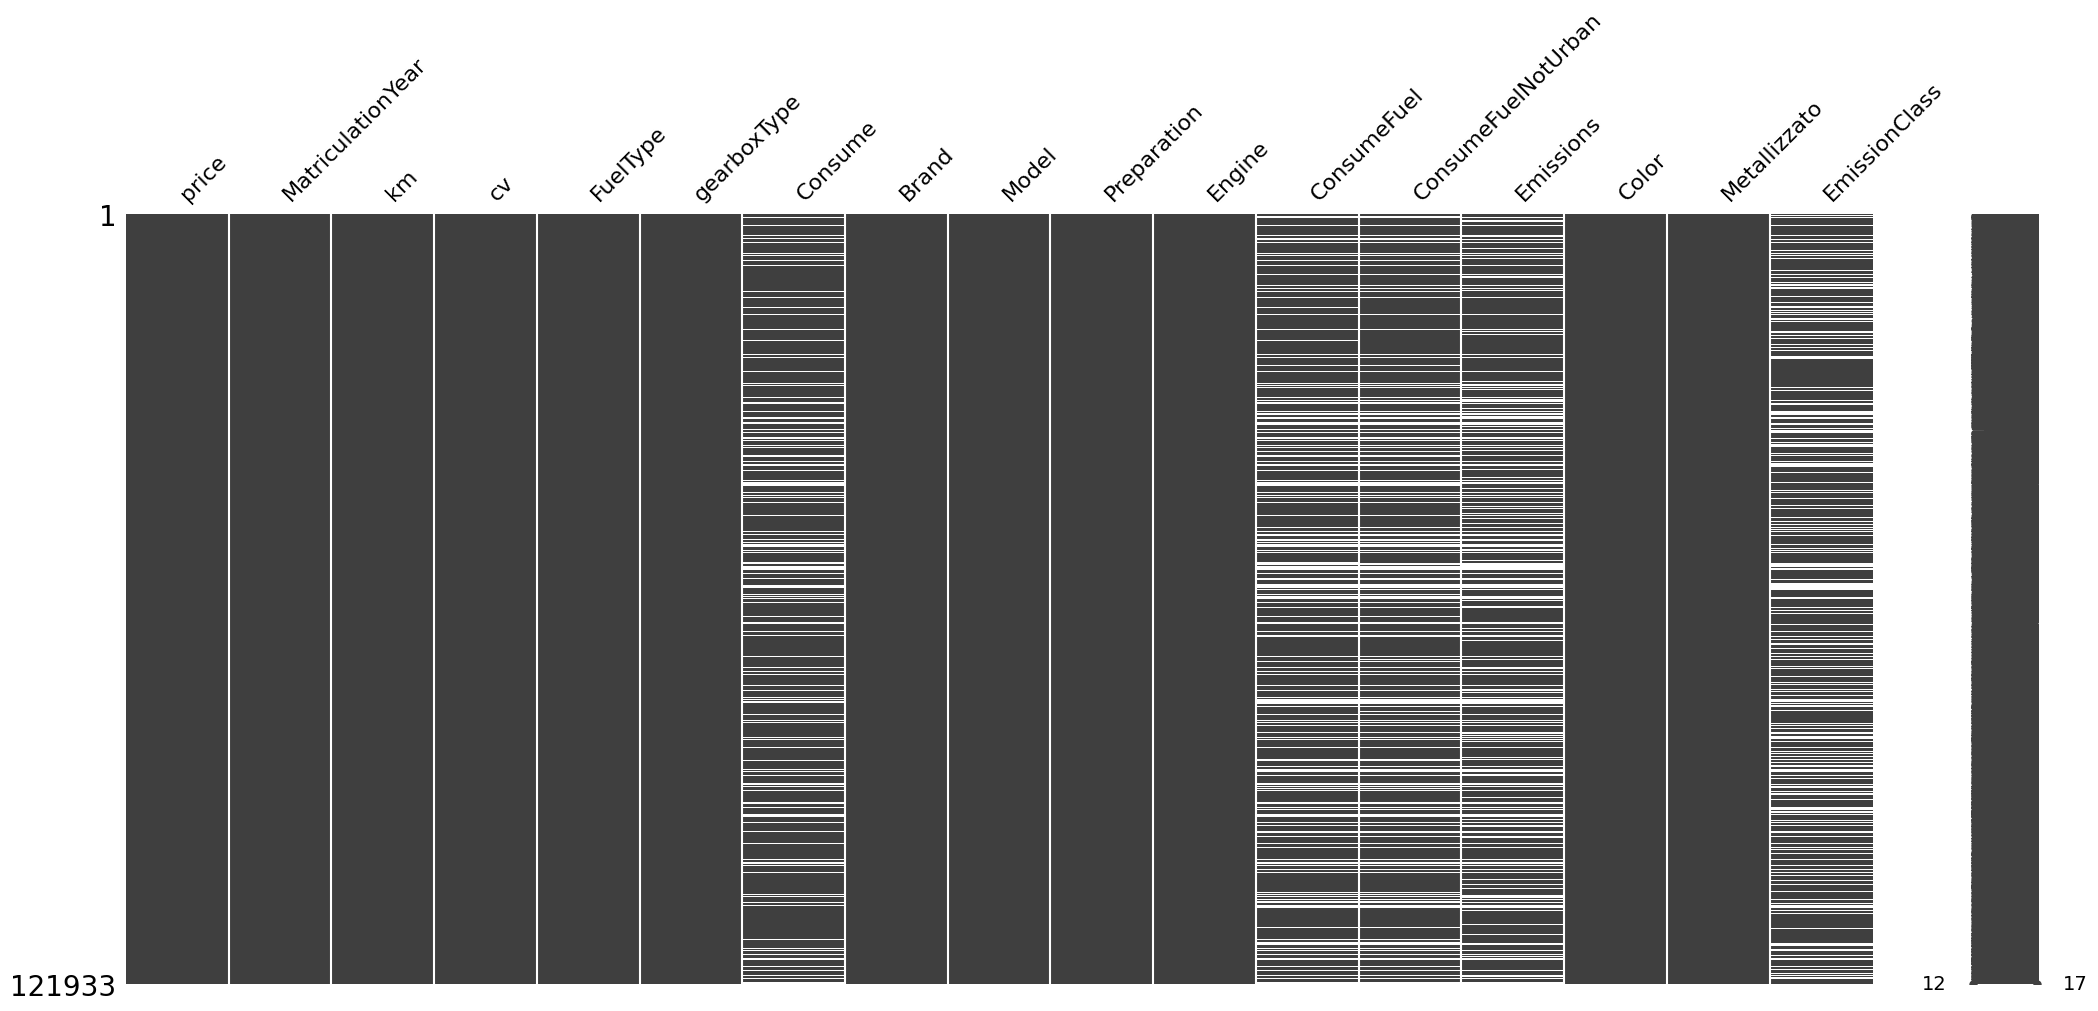

This is the barplot showing the amount of filled values for each column: 



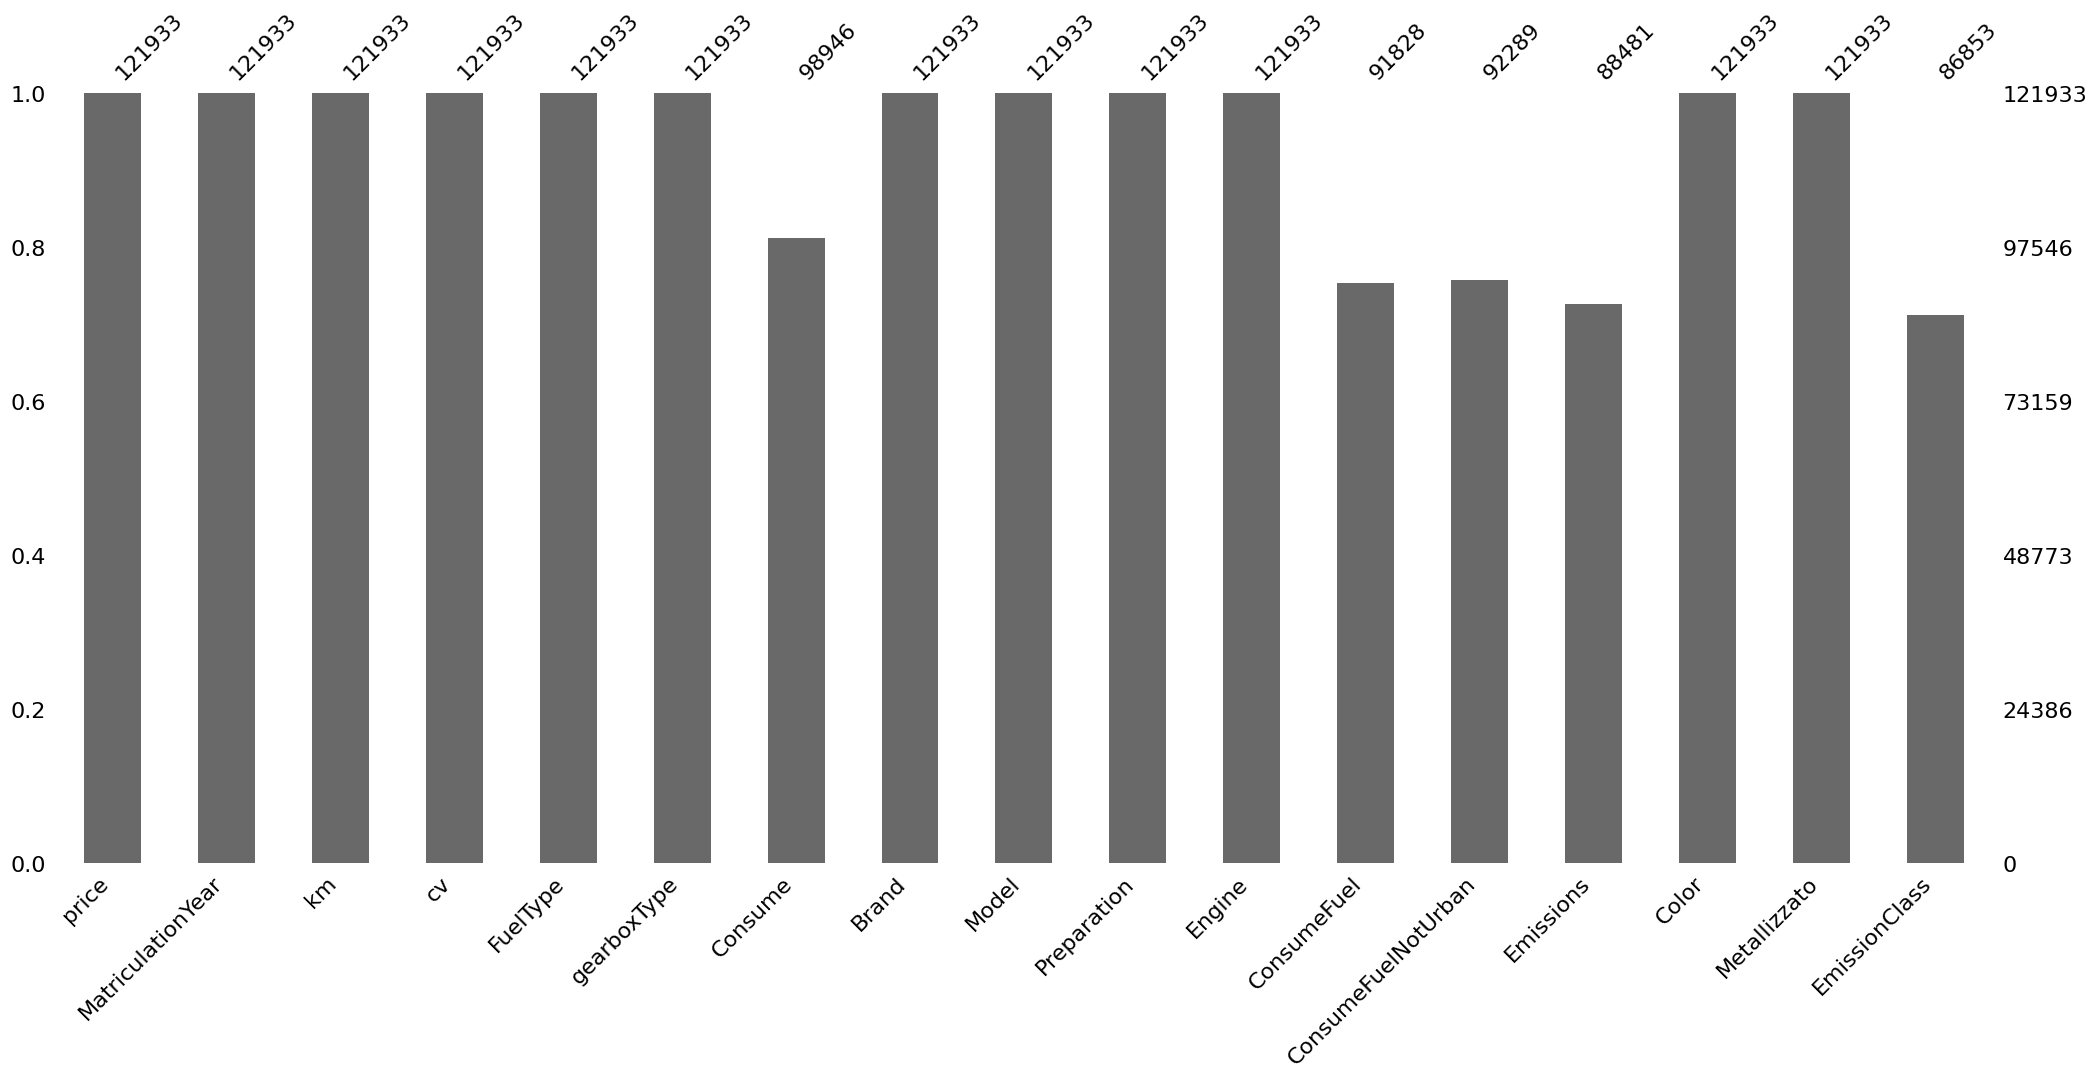

In [14]:
#df.drop(['Metallizzato'], axis=1, inplace=True)
df.drop(['MatriculationMonth'], axis=1, inplace=True)
df.drop(['city'], axis=1, inplace=True)
df.drop(['province'], axis=1, inplace=True)
#df.drop(['Preparation'], axis=1, inplace=True)
df.drop(['Seats'], axis=1, inplace=True)
#df.drop(['Color'], axis=1, inplace=True)
df.drop(['Airbag'], axis=1, inplace=True)
df.drop(['NumberDoors'], axis=1, inplace=True)
df.drop(['AirConditioning'], axis=1, inplace=True)
df.drop(['Interior'], axis=1, inplace=True)
features(df)
check_missing_values(df, True)
df.reset_index(inplace=True)

#### Categorical encoding and value imputing with Neural Network models

In [15]:
"""
airConditioning_map = { 'Climatizzatore automatico':1,
                        'Climatizzatore manuale':0,
                        'Senza climatizzatore':-1
                    }
df['AirConditioning'] = df['AirConditioning'].map(airConditioning_map)
"""

"\nairConditioning_map = { 'Climatizzatore automatico':1,\n                        'Climatizzatore manuale':0,\n                        'Senza climatizzatore':-1\n                    }\ndf['AirConditioning'] = df['AirConditioning'].map(airConditioning_map)\n"

In [16]:
"""
doors_map = {'2 o 3 porte':0, '4 o 5 porte':1, '6 o 7 porte':2}
df['NumberDoors'] = df['NumberDoors'].map(doors_map)
"""

"\ndoors_map = {'2 o 3 porte':0, '4 o 5 porte':1, '6 o 7 porte':2}\ndf['NumberDoors'] = df['NumberDoors'].map(doors_map)\n"

In [17]:
#gearBox_map = {'Cambio manuale':0, 'Cambio Semiautomatico':1, 'Cambio automatico':2}
#df['gearboxType'] = df['gearboxType'].map(gearBox_map)

#### Consume column

The aim of this section is to better investigate the 'Consume' of the cars. I will try to build an estimator of car consumes in order to delete the three columns 'Consume' related, and add a new column. This new column will basically contain as many values as the number of cars, and these will be the results of different scenario that may come to hand:
- 'Consume' column is filled, and it contains either a value that is the same of the value contained in the same row under one between the columns 'ConsumeFuel' or 'ConsumeFuelNotUrban', or under both these columns. In such case, I will keep the most frequent value.
- 'ConsumeFuel' and 'ConsumeFuelNotUrban' are both filled, while the column 'Consume' is not filled. In such scenario, I will compute the mean between the two filled columns and keep such value as relevant.
- No 'Consume' related column is filled. For this scenario, I will wait to see the results of the previous two cases.

In [18]:
consume_df = df[['Consume', 'ConsumeFuel', 'ConsumeFuelNotUrban']].copy() # Build a sub-dataset containing only the columns relevant for this scenario
consume_df['MeanConsume'] = np.nan # Add the column for the mean consumption and fill it with nan
consume_df

Consume  ConsumeFuel  ConsumeFuelNotUrban  MeanConsume
0          7.2          7.2                  5.6          NaN
1          3.8          3.8                  3.3          NaN
2          5.9          5.9                  5.5          NaN
3          6.2          6.2                  5.7          NaN
4          4.3          4.3                  4.0          NaN
...        ...          ...                  ...          ...
121928     4.1          4.1                  3.7          NaN
121929     4.1          4.1                  3.7          NaN
121930     3.8          3.8                  3.4          NaN
121931     3.8          3.8                  3.4          NaN
121932     4.1          4.1                  3.7          NaN

[121933 rows x 4 columns]

Let's see the type of each series in the consume_df.

In [19]:
consume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121933 entries, 0 to 121932
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consume              98946 non-null  object 
 1   ConsumeFuel          91828 non-null  float64
 2   ConsumeFuelNotUrban  92289 non-null  float64
 3   MeanConsume          0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 3.7+ MB


Seen that the type of the 'Consume' column is different from the expected (should be a float), we process this column in order to extract the relevant info.</br></br>
To do that, we will use the 'consume_numerizer' function defined at the beginning of this notebook. The function will work on the column thanks to the 'pd.apply' method.

In [20]:
consume_df['Consume'] = consume_df['Consume'].apply(consume_numerizer)
consume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121933 entries, 0 to 121932
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consume              98946 non-null  float64
 1   ConsumeFuel          91828 non-null  float64
 2   ConsumeFuelNotUrban  92289 non-null  float64
 3   MeanConsume          0 non-null      float64
dtypes: float64(4)
memory usage: 3.7 MB


As we can see the funciton worked, now the type we have is the right one also for the 'Consume' column.

The following steps are aimed at the extraction of the relevant values from the three columns, as described at the beginning of this part.

In [21]:
for index, row in consume_df.iterrows():
    # row['Consume']
    # row['ConsumeFuel']
    # row['ConsumeFuelNotUrban']
    general = False
    urban = False
    uotUrban = False
    
    values = list()

    if not isnan(row['Consume']):
        general = True
        values.append(row['Consume'])

    if not isnan(row['ConsumeFuel']):
        urban = True
        values.append(row['ConsumeFuel'])

    if not isnan(row['ConsumeFuelNotUrban']):
        notUrban = True
        values.append(row['ConsumeFuelNotUrban'])

    mode = check_consume_row(general, urban, notUrban)
    if len(values) != 0:
        inferred_consumption = compute_consume(values, mode)
        consume_df.loc[index, 'MeanConsume'] = inferred_consumption
consume_df

Consume  ConsumeFuel  ConsumeFuelNotUrban  MeanConsume
0           7.2          7.2                  5.6          7.2
1           3.8          3.8                  3.3          3.8
2           5.9          5.9                  5.5          5.9
3           6.2          6.2                  5.7          6.2
4           4.3          4.3                  4.0          4.3
...         ...          ...                  ...          ...
121928      4.1          4.1                  3.7          4.1
121929      4.1          4.1                  3.7          4.1
121930      3.8          3.8                  3.4          3.8
121931      3.8          3.8                  3.4          3.8
121932      4.1          4.1                  3.7          4.1

[121933 rows x 4 columns]

In [22]:
check_missing_values(consume_df)

The percentage of missing values is the following: 

 Consume                18.85
ConsumeFuel            24.69
ConsumeFuelNotUrban    24.31
MeanConsume            18.25
dtype: float64 




As we can see, the problem has been only partially solved. With the above method, we have been able to add only around the 1% of the original missing values (from 26% missing, to 25%). At this point, we need to figure out a different solution in order to impute the still high percentage of missing values.

Before doing everything else, I will remove the unused columns 'Consume', 'ConsumeFuel' and 'ConsumeNotUrban' from the dataset, and add the new 'MeanConsume' column.

In [23]:
df['Consume'] = consume_df['MeanConsume'] # assign the new column to the original dataframe
df.drop(['ConsumeFuel', 'ConsumeFuelNotUrban'], axis=1, inplace=True)
features(df)

The dataframe now contains 16 columns.
 The header is: Index(['index', 'price', 'MatriculationYear', 'km', 'cv', 'FuelType',
       'gearboxType', 'Consume', 'Brand', 'Model', 'Preparation', 'Engine',
       'Emissions', 'Color', 'Metallizzato', 'EmissionClass'],
      dtype='object').


The more handy solution I found is to train a Deep Learning estimator model on the data we have, and thanks to it I will impute the missing cells with an estimate produced by my model.</br>
In the building of the model, and during its training, I have spotted some outliers in data. In particular, for what concerns this part, I am interested in removing the outliers of the following columns: 'cv', 'Engine' and 'Consume'. An example of such outliers can be seen in the following image, where the value inside the higlighted cell represent the Consume value of an Audi A4 (6000l/100km seems a little bit high to be a real value...):
</br></br> 
![Outliers in Consume column](img/outliers_in_data.png)
</br></br> 
These values will be removed now thanks to the <span style="color:yellow">'outliers_deletion'</span> function.

<span style="color:red">DISCLAIMER</span>: The outliers are removed directly from the original dataframe.

In [24]:
check_lost_data(df)

We lost the 31.59% of the initial observations.


For the 'cv' column, I will also drop all vehicles with less than 1hp. This is because they strongly influence the distribution of the values in this column. Additionally, there are not so many cars with less than 1hp, making me wonder whether these can or not be considered 'special cases'.

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              18.21
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            27.39
Color                 0.00
Metallizzato          0.00
EmissionClass        28.73
dtype: float64 


Old Shape:  (121851, 16)


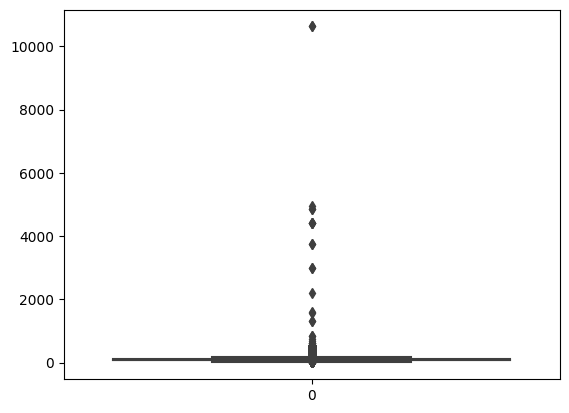

New Shape:  (116530, 16)


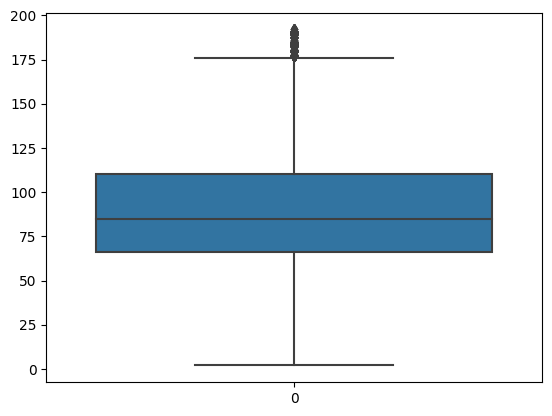

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              18.27
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            27.36
Color                 0.00
Metallizzato          0.00
EmissionClass        28.17
dtype: float64 


We lost the 34.62% of the initial observations.


In [25]:
threshold = 1
# create a boolean mask of rows to keep
mask = df['cv'] > threshold
# apply the mask to the dataframe
df = df[mask]

outliers_deletion(df, 'cv', threshold=2, drop_NaN=False)

As you can see, with the above script we have removed some of the initial observations because classified as outliers.

Now, we can go on with our outliers detection process by applying the same function to other columns.</br>
For the 'Engine' feature, I will remove also values lower than 500. This decision has been driven from the fact that we want to predict car prices thus, all the engines lower than 500 do not represent for sure cars, but at most scooters, in which we are not interested.

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              18.15
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            23.94
Color                 0.00
Metallizzato          0.00
EmissionClass        28.75
dtype: float64 


Old Shape:  (111281, 16)


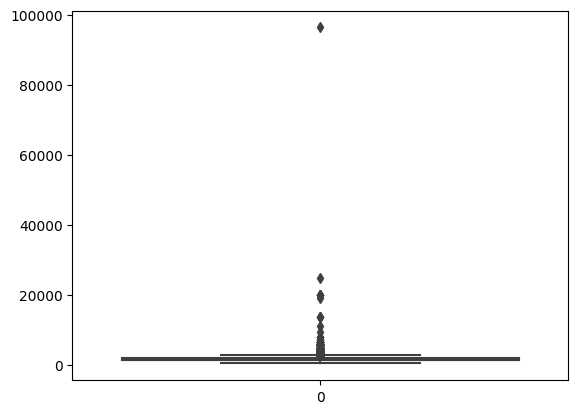

New Shape:  (110598, 16)


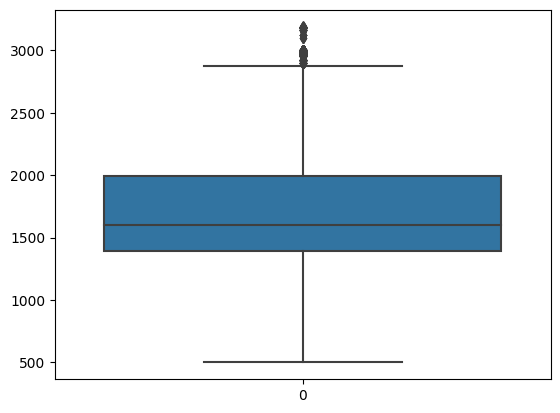

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              17.93
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            23.63
Color                 0.00
Metallizzato          0.00
EmissionClass        28.55
dtype: float64 


We lost the 37.95% of the initial observations.


In [26]:
threshold = 500
# create a boolean mask of rows to keep
mask = df['Engine'] >= threshold
# apply the mask to the dataframe
df = df[mask]
outliers_deletion(df, 'Engine', threshold=2, drop_NaN=False)

The same is true for 'Consume' feature, which is hardly higher than 30.

In [27]:
threshold = 30
# create a boolean mask of rows to keep
mask = df['Consume'] <= threshold
# create a second boolean mask for NaN
null_mask = df['Consume'].isnull()
# combine the two masks using logical OR 
combined_mask = mask | null_mask
# apply the mask to the dataframe
df = df[combined_mask]
check_missing_values(df)

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              17.93
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            23.63
Color                 0.00
Metallizzato          0.00
EmissionClass        28.56
dtype: float64 




The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              17.93
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            23.63
Color                 0.00
Metallizzato          0.00
EmissionClass        28.56
dtype: float64 


Old Shape:  (110592, 16)


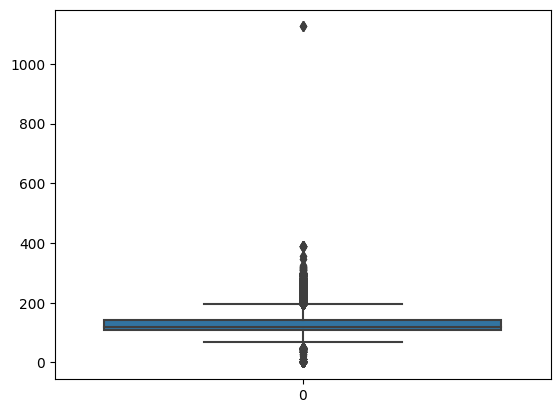

New Shape:  (108335, 16)


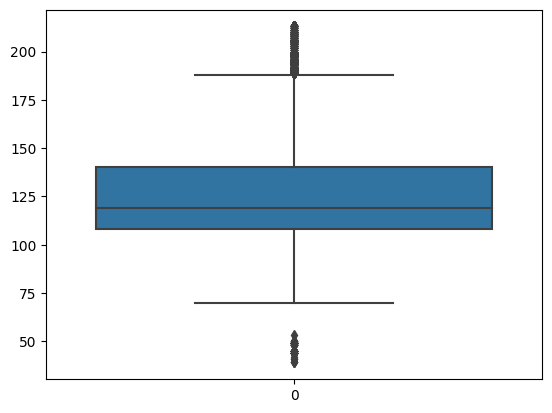

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume              18.25
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            24.13
Color                 0.00
Metallizzato          0.00
EmissionClass        28.81
dtype: float64 


We lost the 39.22% of the initial observations.


In [28]:
outliers_deletion(df, 'Emissions', threshold=2, drop_NaN=False)

Now that all the outliers have been removed from the relevant columns, I will build a sub-dataframe made up of columns relevant to predict missing values for the 'Consume' feature. Such columns are 'cv' and 'Engine'.

As we can see, the percentage of missing values in the 'Consume' column is still pretty high (i.e. 18.07% of values are null). Thus, we can go on by defining the estimator and by imputing the missing cells with the estimate produced by the model.

First of all, let's define an instance of the EstimatorManager object.

In [29]:
estimators = EstimatorManager()

Now, we can add our first model, together with the path where it has been saved. Let's call it '<b>ConsumeEstimator</b>'.

In [30]:
estimators.add_model('ConsumeEstimator', 'Neural Networks/models/consume_estimator_2dim')

Now, we can build the sub-dataframe, as stated above.

In [31]:
consume_df = df[['cv', 'Engine', 'Consume']].copy()
check_missing_values(consume_df)

The percentage of missing values is the following: 

 cv          0.00
Engine      0.00
Consume    18.25
dtype: float64 




According to the way in which the model works, we have to scale the predictive features. To do that, we will define an instance of the 'StandardScaler' from sklearn.</br>
After that, we will predict the missing values.

In [32]:
standard_scaler = preprocessing.StandardScaler()
null_idxs_list = list()
features_list = list()
for idx, row in consume_df.iterrows():
    if isnan(row['Consume']):
        null_idxs_list.append(idx)
        features_list.append(np.array([row['cv'], row['Engine']]))

In [33]:
features_list = standard_scaler.fit_transform(features_list)
predicted_consumes = estimators.predict('ConsumeEstimator', features_list)
for i, prediction in enumerate(predicted_consumes):
    consume_df.loc[null_idxs_list[i], 'Consume'] = round(float(prediction), 2)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-29 00:49:56.656819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 00:49:56.656906: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 38/618 [>.............................] - ETA: 1s

2023-03-29 00:49:57.128490: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-29 00:49:57.166799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


618/618 [==============================] - 2s 3ms/step


Now that we have predicted the missing values for the 'Consume' row, let's add them to the original dataframe.

In [34]:
df['Consume'] = consume_df['Consume']

In [35]:
check_missing_values(df)
check_lost_data(df)

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume               0.00
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            24.13
Color                 0.00
Metallizzato          0.00
EmissionClass        28.81
dtype: float64 


We lost the 39.22% of the initial observations.


#### EmissionClass Feature

According to the European directives, it is possible to infer the Emission Class of a vehicle by looking at the year in which it has been matriculated. Obviously, this method is not perfect, but it is worth trying. In particular, I think that the error in imputing such missing values in the emission class by looking at the 'MatriculationYear' feature is pretty low.</br></br>
It follows the list of years, together with the emission class that got introduced:
- Euro 0: before the year 1993;
- Euro 1: from the year 1993;
- Euro 2: from the year 1997;
- Euro 3: from the year 2001;
- Euro 4: from the year 2006;
- Euro 5: from the year 2011;
- Euro 6: from the year 2015.</br>

According to these data, I will now impute the missing values.

In [36]:
emissions_df = df[['MatriculationYear', 'EmissionClass']].copy() # build subset-copy of the original dataframe

"""
The following snippet has the aim to check whether the value in the EmissionClass column
is a string or not. If it is not, it calls the function defined at the beginning of this notebook 
in order to infehere the emission class on the matriculation year of the car.
"""
for idx, row in emissions_df.iterrows():
    if type(row['EmissionClass'])!=str:
        inferred_emission_class = check_emission_class(row['EmissionClass'], row['MatriculationYear'])
        emissions_df.loc[idx, 'EmissionClass'] = inferred_emission_class
emissions_df.isna().sum()

MatriculationYear    0
EmissionClass        0
dtype: int64

Now that every missing value in the EmissionClass column has been imputed, I will replace the original EmissionClass column with the imputed one. 

In [37]:
df['EmissionClass'] = emissions_df['EmissionClass'] # assign the new column to the original dataframe
check_missing_values(df) # Check missing values status in the df

The percentage of missing values is the following: 

 index                 0.00
price                 0.00
MatriculationYear     0.00
km                    0.00
cv                    0.00
FuelType              0.00
gearboxType           0.00
Consume               0.00
Brand                 0.00
Model                 0.00
Preparation           0.00
Engine                0.00
Emissions            24.13
Color                 0.00
Metallizzato          0.00
EmissionClass         0.00
dtype: float64 




Seen that the 'Emissions' column basically carries the same kind of information that is carried out by the 'EmissionClass' column, and seen that we have imputed the missing values in the 'EmissionClass' column, we can think about dropping the 'Emissions' column. But, before taking such decision, I prefer to impute such values thanks to a Neural Network model that I have trained on data at my disposal.

Before imputing the 'Emissions' column, we have to map, by means of an ordinal scale (supposing also that a higher emission class contributes to a higher price), the labels contained inside the 'EmissionClass' column.</br>
This mapping has to be done at two different times. The first time (this one), I will use an inverse ordering - because I have decided to train the model in that way. While, the second one will follow the standard ordinal mapping, by matching the eumission class reported (e.g. if we have 'Euro 6', the mapping will point to a 6 during the second step, while for now we will point to a 0).

In [38]:
emissions_df = df[['Consume', 'cv', 'Engine', 'EmissionClass', 'Emissions']].copy()
check_missing_values(emissions_df)

The percentage of missing values is the following: 

 Consume           0.00
cv                0.00
Engine            0.00
EmissionClass     0.00
Emissions        24.13
dtype: float64 




In [39]:
emission_map = {'Euro 0':6, 'Euro 1':5, 'Euro 2':4, 'Euro 3':3, 'Euro 4':2, 'Euro 5':1, 'Euro 6':0}
emissions_df['EmissionClass'] = emissions_df['EmissionClass'].map(emission_map).astype('int')

Now, we can add our second model to our estimator manager, together with the path where it has been saved. Let's call it '<b>EmissionsEstimator</b>'.

In [40]:
estimators.add_model('EmissionsEstimator', 'Neural Networks/models/emissions_estimator_4dim')

In [41]:
standard_scaler = preprocessing.StandardScaler()
null_idxs_list = list()
features_list = list()
for idx, row in emissions_df.iterrows():
    if isnan(row['Emissions']):
        null_idxs_list.append(idx)
        features_list.append(np.array([row['Consume'],row['cv'],row['Engine'],row['EmissionClass']]))

In [42]:
features_list = standard_scaler.fit_transform(features_list)
predicted_emissions = estimators.predict('EmissionsEstimator', features_list)
for i, prediction in enumerate(predicted_emissions):
    emissions_df.loc[null_idxs_list[i], 'Emissions'] = round(float(prediction), 2)

 48/817 [>.............................] - ETA: 2s

2023-03-29 00:50:05.125628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


817/817 [==============================] - 3s 3ms/step


In [43]:
check_missing_values(emissions_df)

The percentage of missing values is the following: 

 Consume          0.0
cv               0.0
Engine           0.0
EmissionClass    0.0
Emissions        0.0
dtype: float64 




In [44]:
df['Emissions'] = emissions_df['Emissions']

### Brief breath

At this point, we can take a stop and look back to our imputed dataset. I will start by investigating the correlation between variables. This, will be done, immediately after we have applied the mapping for the emission class.

In [45]:
emission_map = {'Euro 0':0, 'Euro 1':1, 'Euro 2':2, 'Euro 3':3, 'Euro 4':4, 'Euro 5':5, 'Euro 6':6}
df['EmissionClass'] = df['EmissionClass'].map(emission_map).astype('int')

Now, let's plot some stats about correlation and missing data.

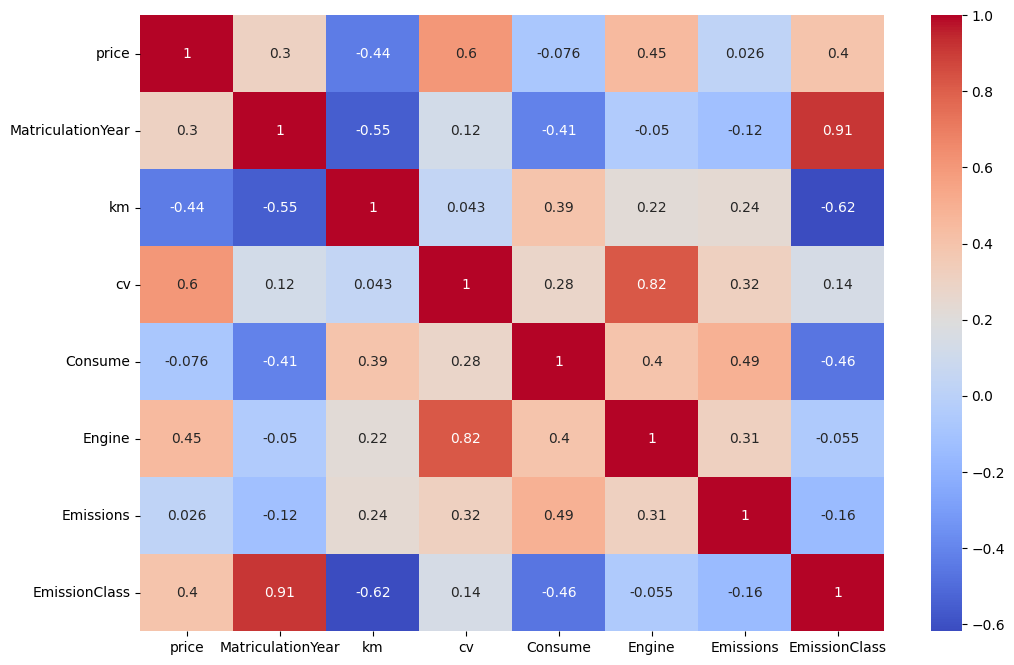

In [46]:
df.drop(['index'], axis=1, inplace=True)
df.reset_index()
plot_correlation(df)

Since we have used the 'EmissionClass' column, together with the 'cv' and 'Engine' columns to predict the 'Emissions' values, and seen that the 'EmissionClass' column is higly correlated with the 'MatriculationYear' feature, I will drop the 'EmissionClass' column.

In [47]:
#df.drop(['EmissionClass'], axis=1, inplace=True)

The percentage of missing values is the following: 

 price                0.0
MatriculationYear    0.0
km                   0.0
cv                   0.0
FuelType             0.0
gearboxType          0.0
Consume              0.0
Brand                0.0
Model                0.0
Preparation          0.0
Engine               0.0
Emissions            0.0
Color                0.0
Metallizzato         0.0
EmissionClass        0.0
dtype: float64 


This is the matrix showing missing values for each column: 



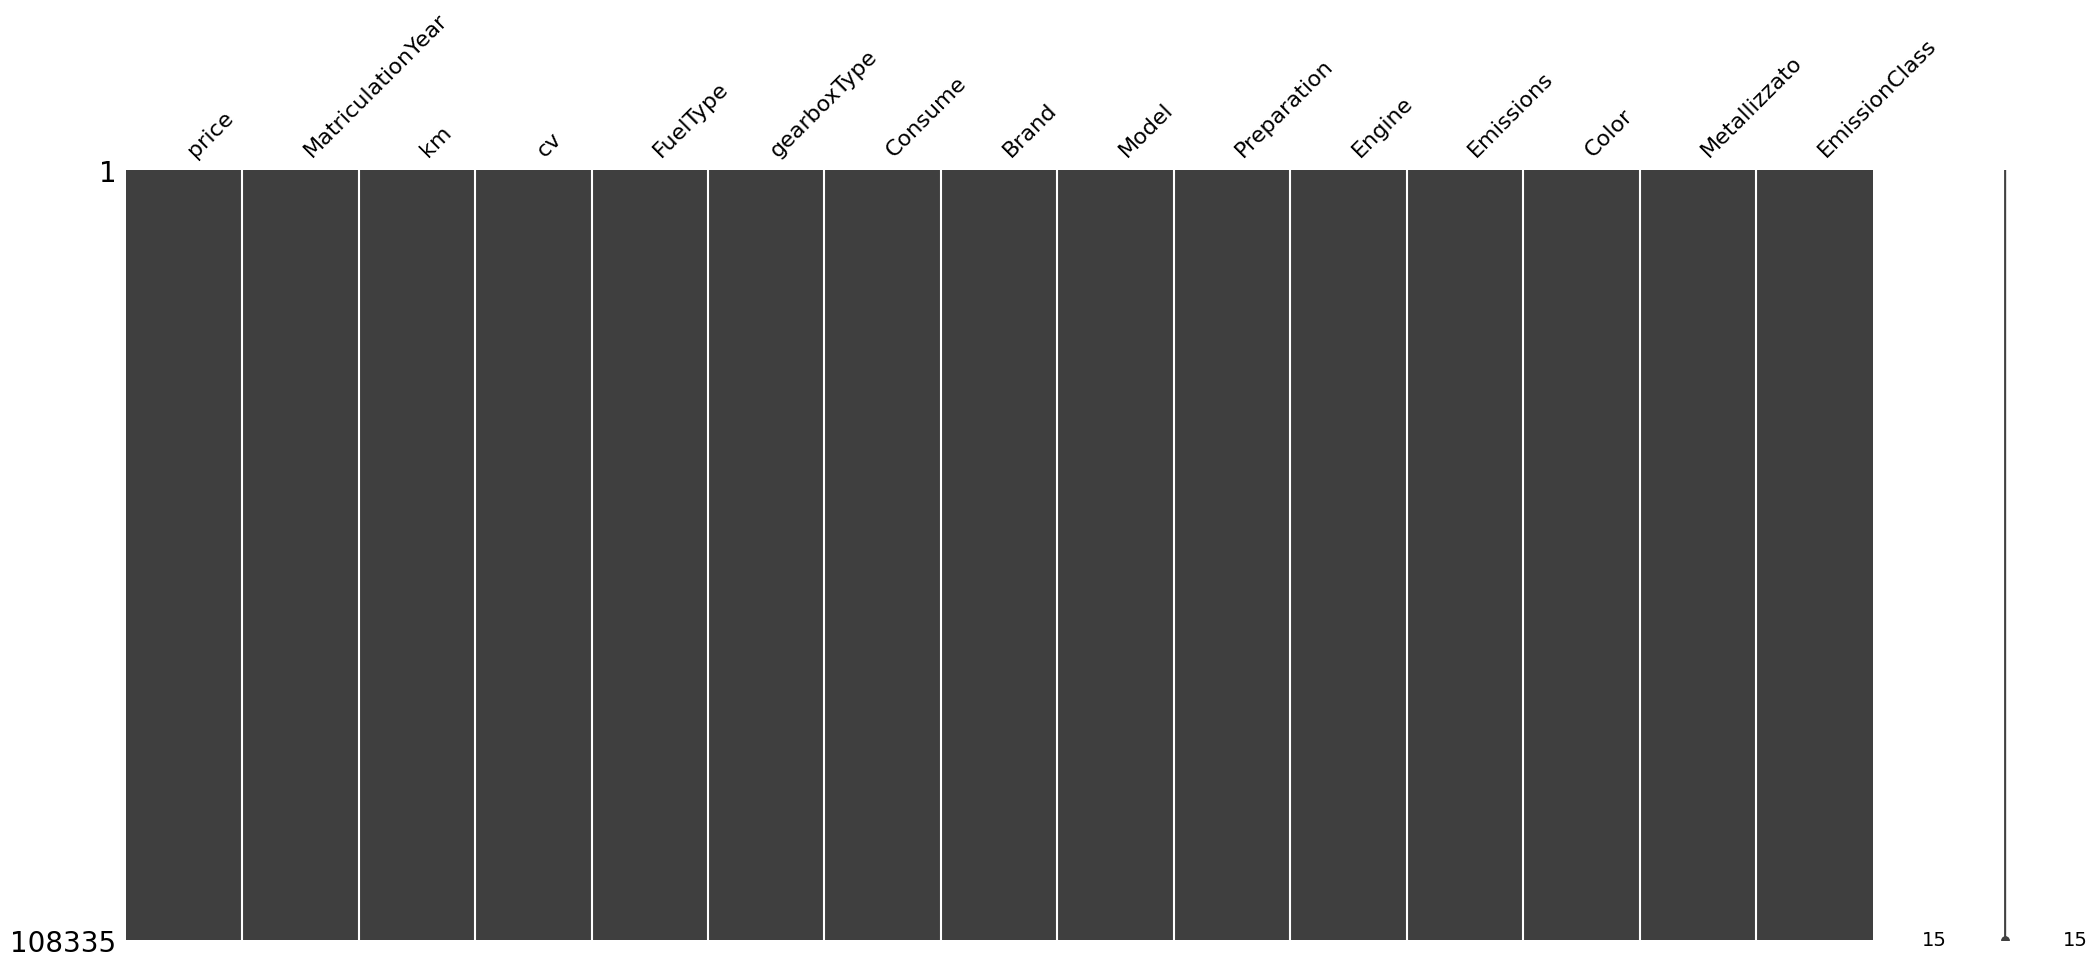

This is the barplot showing the amount of filled values for each column: 



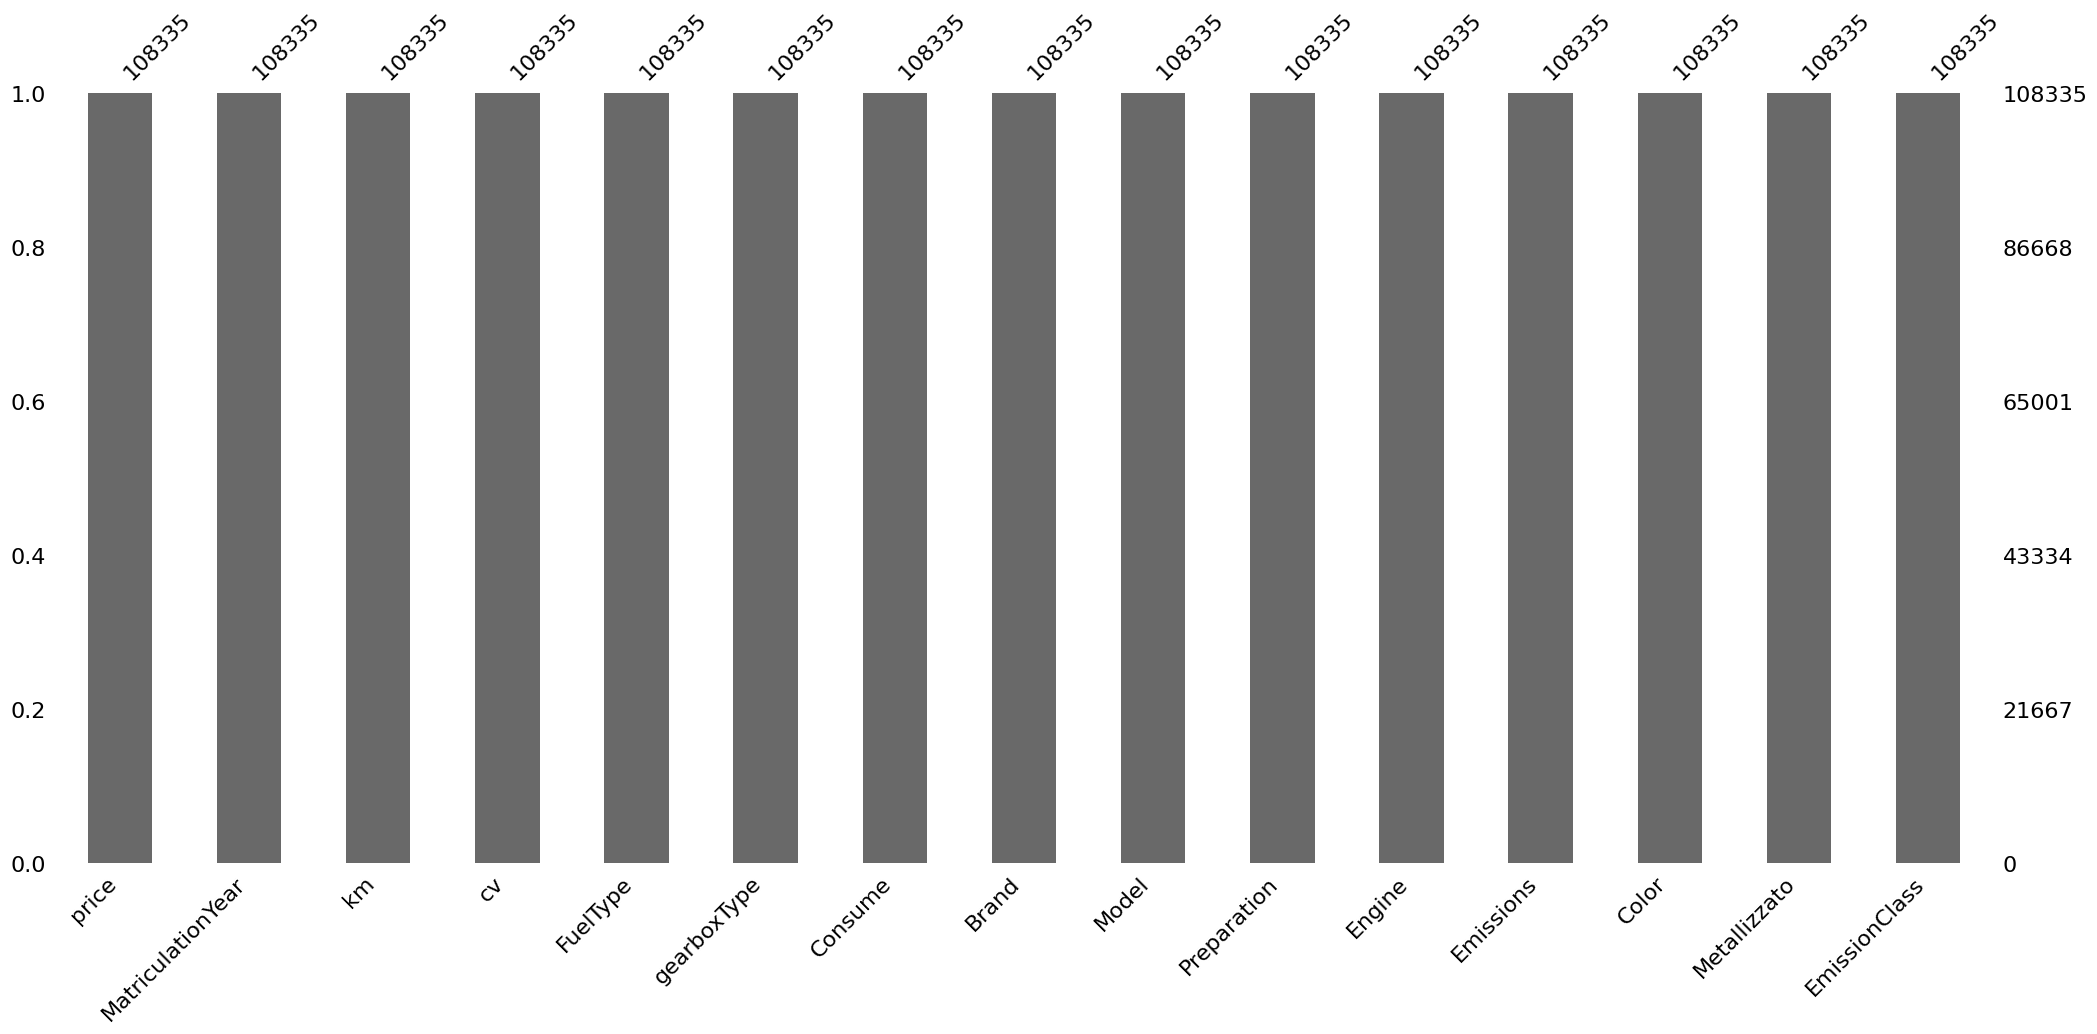

We lost the 39.22% of the initial observations.


In [48]:
check_missing_values(df, visualization=True)
check_lost_data(df)

#### Dealing with the 'km' feature

This feature is a particular case in my opinion.</br>
I will remove outliers from this column but, in this case, I won't use the IQR to detect them. The reason for which I won't use the IQR range is that the feature is left skewed and thus, by using the IQR I would end up in removing real and useful values (such as the one above 250000).

Let's start by looking at the distribution of the column by means of an histogram.

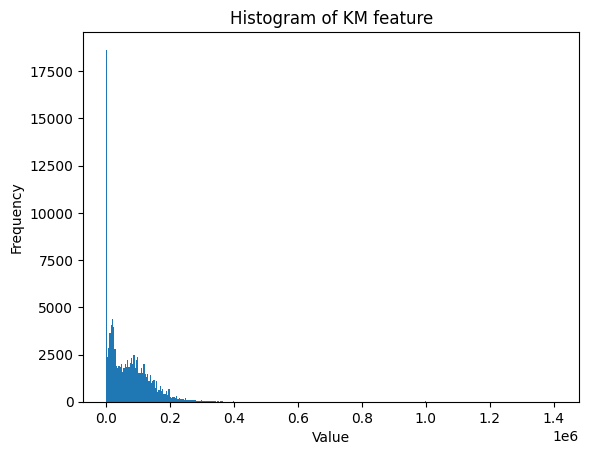

In [49]:
plt.hist(df['km'], bins='auto')
plt.title('Histogram of KM feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

As we can see, the cars with a low number of kilometers are extremely high, in particular if compared with the columns with values around a normal car life-span (which is around 500000km). Additionally, there are also values around 999999, which is impossible in my opinion. </br>
Seen this, I have decided to define a threshold for values which are basically too high. The threshold I have decided to define is 700000km. Thus, all the values above this threshold will be droppped. We will see whether the model will be able or not to fit data in a good way.

In [50]:
print('Before removing values above the threshold, we were at this point:')
check_lost_data(df)

Before removing values above the threshold, we were at this point:
We lost the 39.22% of the initial observations.


In [51]:
threshold = 800000
# create a boolean mask of rows to keep
mask = df['km'] <= threshold
# apply the mask to the dataframe
df = df[mask]

In [52]:
print('After the deletion, we are at this point:')
check_lost_data(df)

After the deletion, we are at this point:
We lost the 39.23% of the initial observations.


In [53]:
check_missing_values(df)

The percentage of missing values is the following: 

 price                0.0
MatriculationYear    0.0
km                   0.0
cv                   0.0
FuelType             0.0
gearboxType          0.0
Consume              0.0
Brand                0.0
Model                0.0
Preparation          0.0
Engine               0.0
Emissions            0.0
Color                0.0
Metallizzato         0.0
EmissionClass        0.0
dtype: float64 




At this point, let's check the type of objects we have in our dataframe.

In [54]:
df.dtypes

price                  int64
MatriculationYear      int64
km                   float64
cv                   float64
FuelType              object
gearboxType           object
Consume              float64
Brand                 object
Model                 object
Preparation           object
Engine               float64
Emissions            float64
Color                 object
Metallizzato          object
EmissionClass          int64
dtype: object

We have to deal with the Brand, FuelType and Model columns before fitting a model.</br>
To decide how to deal with these features, let's print out again the number of unique values they contain.

In [55]:
df.nunique()

price                 2807
MatriculationYear       69
km                   26155
cv                     183
FuelType                 9
gearboxType              2
Consume                630
Brand                   80
Model                  690
Preparation          10811
Engine                 477
Emissions             2823
Color                   13
Metallizzato             2
EmissionClass            7
dtype: int64

For what concerns the 'gearboxType' class, we have now 2 unique values, we have probably dropped the third one ('Cambio semi-automatico'), but this is not a big deal, in fact there were only 13 rows with such value.

Now, let's analyze the remaining categorical features. I will substitute with 'Other' all the values with a frequency lower than 5%.</br>
The 'Brand' feature will be treated as a special case. In fact, some kind of distinction must be done between "normal car brands" and "luxury car brands". To do that, I will firstly print out all the unique values of the column.

In [56]:
unique_car_brands = [list(df['Brand'].unique())]
print(unique_car_brands)

[['VOLKSWAGEN', 'MERCEDES BENZ', 'BMW', 'SUZUKI', 'MINI', 'AUDI', 'FIAT', 'FORD', 'TOYOTA', 'NISSAN', 'OPEL', 'ALFA ROMEO', 'DACIA', 'RENAULT', 'SKODA', 'CITROEN', 'LANCIA', 'ABARTH', 'SMART', 'PEUGEOT', 'SEAT', 'DS', 'CHEVROLET', 'HYUNDAI', 'PORSCHE', 'SAAB', 'LAND ROVER', 'JEEP', 'JAGUAR', 'KIA', 'HONDA', 'SSANGYONG', 'MASERATI', 'SUBARU', 'LEXUS', 'MITSUBISHI', 'Altre Marche', 'ISUZU', 'VOLVO', 'IVECO', 'DAEWOO', 'MAZDA', 'TATA', 'FERRARI', 'CHRYSLER', 'MORGAN', 'LOTUS', 'CATERHAM', 'DAIHATSU', 'DR', 'INFINITI', 'LIGIER', 'MICROCAR', 'DODGE', 'MAHINDRA', 'LADA', 'ROVER', 'MG', 'AUTOBIANCHI', 'PIAGGIO', 'PONTIAC', 'GREAT WALL MOTOR', 'TALBOT', 'GRECAV', 'LAMBORGHINI', 'AUSTIN ROVER', 'INNOCENTI', 'BREMACH', 'CADILLAC', 'TOWN LIFE', 'DAF', 'GIOTTI VICTORIA', 'BUICK', 'RENAULT TRUCKS', 'PANTHER', 'JDM', 'VEM', 'CHATENET', 'BELLIER', 'UAZ']]


Let's create a list of luxury brands, it will be used in order to apply a function that filters the dataset in order tp build an additional column. Such new column, will be used in order to add information about the fact that a car may or not be considered a luxury car.

In [57]:
luxury_brands = ['MASERATI','PORSCHE','JAGUAR','FERRARI','LOTUS','LAMBORGHINI','MERCEDES BENZ','BMW','MINI','AUDI','LAND ROVER','VOLVO','CADILLAC','LANCIA']

def check_luxury_car(row):
    # Function to define whether a car can be considered a luxury car or not
    brand = row['Brand']
    model = row['Model']
    engine = row['Engine']
    preparation = row['Preparation'].lower()
    cv = row['cv']
    matriculation = row['MatriculationYear']
    
    if brand in luxury_brands:
        # Special check for lancia delta
        if brand == 'LANCIA' and matriculation <= 1997 and model == 'Delta':
            if cv >= 150:
                return 'Luxury'
            else:
                return 'Not Luxury'
        
        if 'luxury' in preparation or 'lusso' in preparation:
            return 'Luxury'
        else:
            if cv >= 189 and engine >= 2500:
                return 'Luxury'
            else:
                return 'Not Luxury'
    else:
        return 'Not Luxury'

# I apply the function
df['Luxury_car'] = df.apply(check_luxury_car, axis=1)
luxury_map = {'Not Luxury':0, 'Luxury':1}
df['Luxury_car'] = df['Luxury_car'].map(luxury_map).astype('int')

In [58]:
def check_standard_car(row):
    # Function to define whether a car can be considered a luxury car or not
    brand = row['Brand']
    model = row['Model']
    engine = row['Engine']
    preparation = row['Preparation'].lower()
    cv = row['cv']
    matriculation = row['MatriculationYear']
    
    if brand not in luxury_brands:
        # Special check for lancia delta
        if brand == 'LANCIA' and matriculation <= 1997 and model == 'Delta':
            if cv >= 150:
                return 'Not standard'
            else:
                return 'Standard'
        
        if 'luxury' in preparation or 'lusso' in preparation:
            return 'Not standard'
        else:
            if cv >= 165 and engine >= 1999:
                return 'Not standard'
            else:
                return 'Standard'
    else:
        return 'Not standard'

# I apply the function
df['Standard_car'] = df.apply(check_standard_car, axis=1)
standard_map = {'Not standard':1, 'Standard':0}
df['Standard_car'] = df['Standard_car'].map(standard_map).astype('int')

In [59]:
check_missing_values(df)

The percentage of missing values is the following: 

 price                0.0
MatriculationYear    0.0
km                   0.0
cv                   0.0
FuelType             0.0
gearboxType          0.0
Consume              0.0
Brand                0.0
Model                0.0
Preparation          0.0
Engine               0.0
Emissions            0.0
Color                0.0
Metallizzato         0.0
EmissionClass        0.0
Luxury_car           0.0
Standard_car         0.0
dtype: float64 




Now, let's deal with the 'price' column. I am going to remove outliers from it.

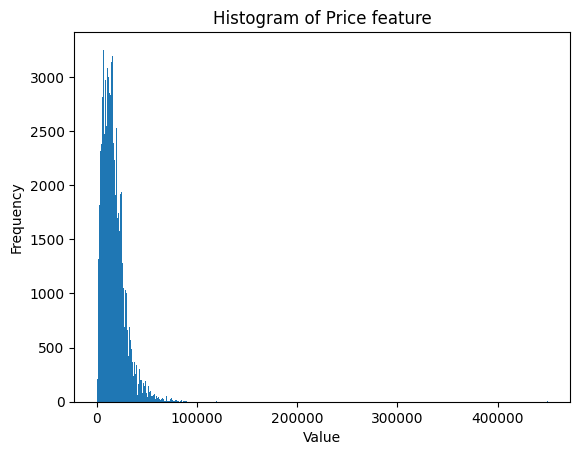

In [60]:
plt.hist(df['price'], bins='auto')
plt.title('Histogram of Price feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Let's analyze deeper the 'price' column.

In [61]:
df['price'].describe()

count    108317.000000
mean      16734.916606
std       12477.105727
min         300.000000
25%        8500.000000
50%       14490.000000
75%       21900.000000
max      450000.000000
Name: price, dtype: float64

In [62]:
IQR = 22300 - 300
lower_bound = 300 - (0.5 * IQR)
upper_bound = 22300 + (0.5 * IQR)
print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

Lower bound:  -10700.0
Upper bound:  33300.0


As we can see above, the IQR defines a lower bound that is too low. Data are for sure skewd, thus I will use a different method to drop outliers. </br>
First of all, I will remove all the observations under a value of 1000€, hoping to have a more general representation of real values (in this way, I hope also to remove all the values relative to mini-cars and scooters), which should not be part of this dataset.

In [63]:
threshold = 1000
# create a boolean mask of rows to keep
mask = df['price'] >= threshold
df = df[mask]
check_lost_data(df)

We lost the 39.45% of the initial observations.


In [64]:
df['price'].describe()

count    107921.000000
mean      16793.382307
std       12462.516683
min        1000.000000
25%        8500.000000
50%       14500.000000
75%       21900.000000
max      450000.000000
Name: price, dtype: float64

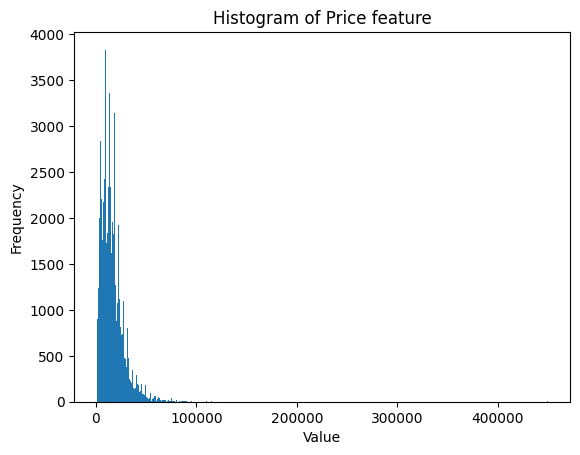

In [65]:
plt.hist(df['price'], bins='auto')
plt.title('Histogram of Price feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

The mean, as well as all the other values, have not changed to much. This is a good sign, we have not removed big portions of the dataset.</br>
Now, it is time to detect and remove outliers with a threshold of 3, that will for sure remove only values higher than the upper bound, while the lower values will remain unchanged.</br>

My hope for this process is to build a more robust model, which will learn more general patterns.

The percentage of missing values is the following: 

 price                0.0
MatriculationYear    0.0
km                   0.0
cv                   0.0
FuelType             0.0
gearboxType          0.0
Consume              0.0
Brand                0.0
Model                0.0
Preparation          0.0
Engine               0.0
Emissions            0.0
Color                0.0
Metallizzato         0.0
EmissionClass        0.0
Luxury_car           0.0
Standard_car         0.0
dtype: float64 


Old Shape:  (107921, 17)


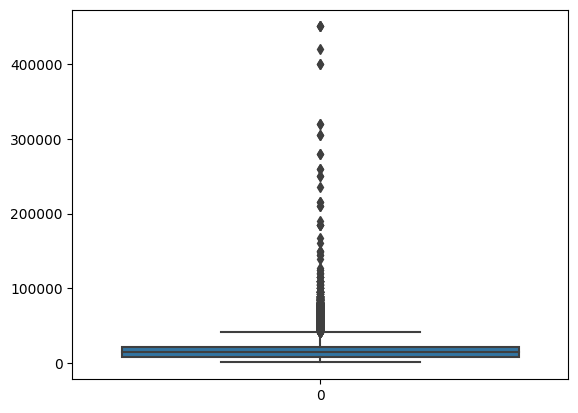

New Shape:  (105457, 17)


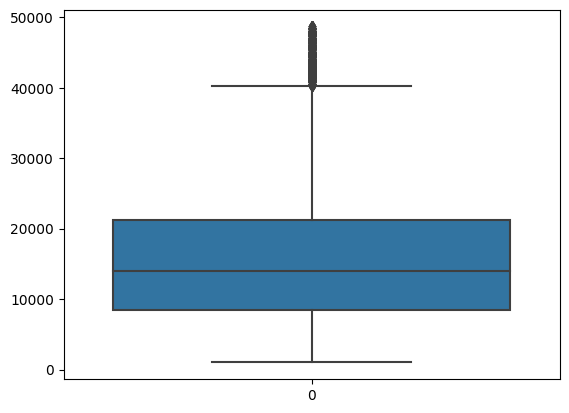

The percentage of missing values is the following: 

 price                0.0
MatriculationYear    0.0
km                   0.0
cv                   0.0
FuelType             0.0
gearboxType          0.0
Consume              0.0
Brand                0.0
Model                0.0
Preparation          0.0
Engine               0.0
Emissions            0.0
Color                0.0
Metallizzato         0.0
EmissionClass        0.0
Luxury_car           0.0
Standard_car         0.0
dtype: float64 


We lost the 40.84% of the initial observations.


In [66]:
outliers_deletion(df, 'price', threshold=2)

Now, we will procede by mapping to 'Other' all values with frequency lower than 4%.

In [67]:
categorical_features = df.dtypes[df.dtypes == 'object'].index

for feature in categorical_features:
    print("Feature: ", feature)
    frequency = (df[feature].value_counts()/df.shape[0])
    to_others = list(frequency[frequency<0.04].index)
    print('other', to_others)
    if len(to_others) > 1:
        df[feature] = df[feature].apply(lambda x: "Other" if x in to_others else x)

Feature:  FuelType
other ['GPL', 'Metano', 'Ibrida (benzina/elettrica)', 'Altro', 'Idrogeno', 'Elettrico', 'Ibrida (diesel/elettrica)']
Feature:  gearboxType
other []
Feature:  Brand
other ['NISSAN', 'OPEL', 'PEUGEOT', 'TOYOTA', 'CITROEN', 'ALFA ROMEO', 'SMART', 'LANCIA', 'JEEP', 'VOLVO', 'KIA', 'HYUNDAI', 'LAND ROVER', 'SKODA', 'SEAT', 'SUZUKI', 'MAZDA', 'DACIA', 'CHEVROLET', 'ABARTH', 'MITSUBISHI', 'JAGUAR', 'IVECO', 'HONDA', 'DS', 'SSANGYONG', 'SUBARU', 'PORSCHE', 'INFINITI', 'DAIHATSU', 'Altre Marche', 'LEXUS', 'SAAB', 'CHRYSLER', 'DR', 'DODGE', 'MASERATI', 'MG', 'TATA', 'ROVER', 'DAEWOO', 'PIAGGIO', 'AUTOBIANCHI', 'GREAT WALL MOTOR', 'MAHINDRA', 'ISUZU', 'LOTUS', 'INNOCENTI', 'MICROCAR', 'AUSTIN ROVER', 'CATERHAM', 'FERRARI', 'LADA', 'BELLIER', 'VEM', 'PANTHER', 'TALBOT', 'LIGIER', 'BUICK', 'GIOTTI VICTORIA', 'CHATENET', 'RENAULT TRUCKS', 'UAZ', 'PONTIAC', 'MORGAN', 'DAF', 'TOWN LIFE', 'CADILLAC', 'JDM', 'GRECAV', 'BREMACH']
Feature:  Model
other ['Golf', 'Panda', 'Serie 3', '500'

Let's check if everything worked.

In [68]:
cat_features = df.dtypes[df.dtypes == 'object'].index
for cat_col in cat_features:
    frequency = (df[cat_col].value_counts()/df.shape[0])
    print(frequency)
df.nunique()

Diesel     0.723783
Benzina    0.224006
Other      0.052211
Name: FuelType, dtype: float64
Cambio manuale       0.712433
Cambio automatico    0.287567
Name: gearboxType, dtype: float64
Other            0.376694
FIAT             0.151057
BMW              0.098097
MERCEDES BENZ    0.079388
VOLKSWAGEN       0.078506
AUDI             0.071953
FORD             0.058479
RENAULT          0.043032
MINI             0.042795
Name: Brand, dtype: float64
Other    1.0
Name: Model, dtype: float64
Other    0.554861
-        0.445139
Name: Preparation, dtype: float64
Bianco     0.257972
Grigio     0.234295
Nero       0.208663
Argento    0.128574
Blu        0.088358
Other      0.041230
Rosso      0.040908
Name: Color, dtype: float64
No    0.505998
Sì    0.494002
Name: Metallizzato, dtype: float64


price                 2399
MatriculationYear       68
km                   25753
cv                     181
FuelType                 3
gearboxType              2
Consume                607
Brand                    9
Model                    1
Preparation              2
Engine                 452
Emissions             2695
Color                    7
Metallizzato             2
EmissionClass            7
Luxury_car               2
Standard_car             2
dtype: int64

Ok, everything was fine. But, now we have the column 'Model' that has been entirely mapped to 'Other' or to the unknown value '-'. Thus, I will drop it.

In [69]:
df.drop(['Model'], axis=1, inplace=True)

Ok then, let's save the dataframe at this point.

In [70]:
df.to_csv("data/cleaned_auto_price.csv", index=False)

-----------

#### Feature engineering

In [71]:
import pandas as pd
import numpy as np
from core_functions import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv('data/cleaned_auto_price.csv', sep=',')

Now, according to some tests done on correlation coefficient, I will map the values of the 'FuelType' feature to an ordinal scale.

In [73]:
fuel_map = {'Diesel':0, 'Benzina':0.5, 'Other':1}
df['FuelType'] = df['FuelType'].map(fuel_map).astype('float')

metal_map = {'No':0, 'Sì':1}
df['Metallizzato'] = df['Metallizzato'].map(metal_map).astype('int')

gearBox_map = {'Other':0.5, 'Cambio manuale':0, 'Cambio automatico':1}
df['gearboxType'] = df['gearboxType'].map(gearBox_map)

I will try to build additional features from the one initially provided. This operation will be guided by the correlation between features.

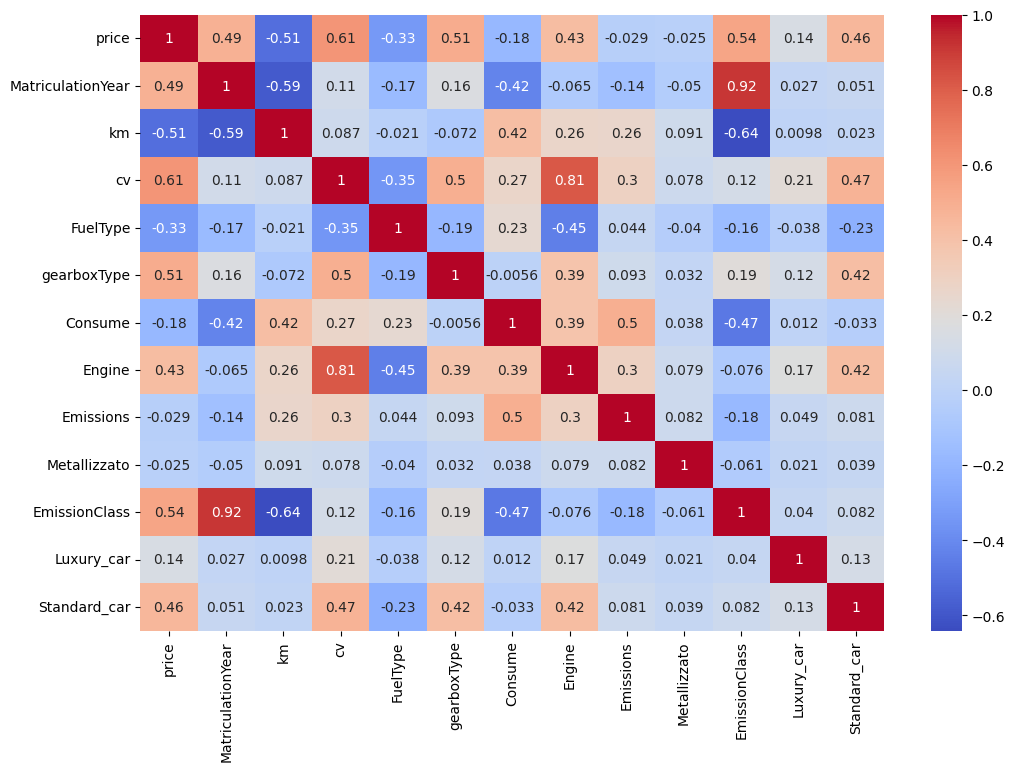

In [74]:
plot_correlation(df)

In [75]:
#df['Standard_car'] = df['Luxury_car'].apply(lambda x: 0 if x == 1 else 1)

As we can see, km, cv, gearboxType and Engine are the highly correlated features. Let's try to work on them.

First of all, I will define two additional features, one to describe whether a car is old or not, and the other to describe if it is new.

In [76]:
df['old_car'] = df['km'].apply(lambda x: 1 if x <= 500000 else 0)
df['new_car'] = df['km'].apply(lambda x: 1 if x <= 15000 else 0)

I will work on the engine, and reduce it to cubic root value. This is a particularly important value, thus needs a bit of representation.

In [77]:
#df['sqrt_engine'] = np.sqrt(df['Engine'])
df['cbrt_engine'] = np.cbrt(df['Engine'])

I will define a custom feature with (I don't know if exists as a real value for cars), but for sure seems useful to predict a sort of possible imbalance between Horsepowers (cv) and engine's CC.

In [78]:
df['power'] = (df['cv']*df['Engine'])

In [79]:
#df['squared_cv'] = np.square(df['cv'])

Finally, I will add the number of kms run in a year.

In [80]:
df['km_per_year'] = (df['km']/pd.datetime.now().year - df['MatriculationYear'])

In [81]:
#df['sqrt_age'] = np.sqrt(pd.datetime.now().year - df['MatriculationYear'])
#df['square_age'] = np.square(pd.datetime.now().year - df['MatriculationYear'])

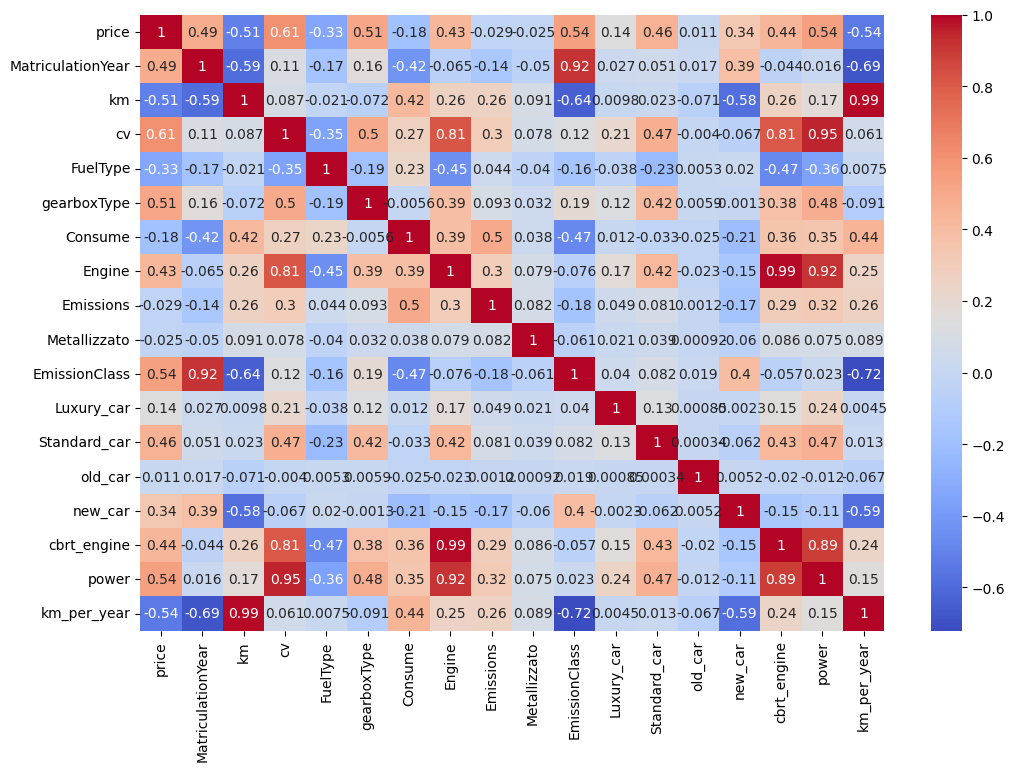

In [82]:
plot_correlation(df)

The last step concerns the deletion of the 'Preparation' feature column. 

In [83]:
#df.drop(['Color'], axis=1, inplace=True)
#df.drop(['Emissions'], axis=1, inplace=True)
#df.drop(['Metallizzato'], axis=1, inplace=True)
df.drop(['Preparation'], axis=1, inplace=True)

In [84]:
df.to_csv("data/engineered_auto_price.csv", index=False)

In [85]:
df = pd.read_csv('data/engineered_auto_price.csv', sep=',')

-----

## Building a model for regression

In [86]:
df.shape

(105457, 20)

### General workflow

As we can see below, we still have three categorical features.

In [87]:
df.dtypes

price                  int64
MatriculationYear      int64
km                   float64
cv                   float64
FuelType             float64
gearboxType          float64
Consume              float64
Brand                 object
Engine               float64
Emissions            float64
Color                 object
Metallizzato           int64
EmissionClass          int64
Luxury_car             int64
Standard_car           int64
old_car                int64
new_car                int64
cbrt_engine          float64
power                float64
km_per_year          float64
dtype: object

Dataframe split into train, validation and test set.

In [88]:
list_of_features = list(df.columns)
list_of_features.remove('price')
X = df[list_of_features].copy()
y = df['price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

The next step involves the distinction between categorical and numerical features.

In [89]:
numerical_features = X_train.select_dtypes(include='number').columns.to_list()
categorical_features = X_train.select_dtypes(include='object').columns.to_list()
print("These are the features:\n\n - Numerical features:\n {} \n\n - Categorical features:\n {}".format(numerical_features, categorical_features))

These are the features:

 - Numerical features:
 ['MatriculationYear', 'km', 'cv', 'FuelType', 'gearboxType', 'Consume', 'Engine', 'Emissions', 'Metallizzato', 'EmissionClass', 'Luxury_car', 'Standard_car', 'old_car', 'new_car', 'cbrt_engine', 'power', 'km_per_year'] 

 - Categorical features:
 ['Brand', 'Color']


Let's look at the unique values in the categorical columns.

In [90]:
unique_categorical_values = [list(X_train[feature].unique()) for feature in categorical_features]
print(unique_categorical_values)

[['FORD', 'AUDI', 'Other', 'BMW', 'RENAULT', 'FIAT', 'MINI', 'MERCEDES BENZ', 'VOLKSWAGEN'], ['Blu', 'Nero', 'Grigio', 'Bianco', 'Other', 'Argento', 'Rosso']]


In [91]:
df

price  MatriculationYear        km     cv  FuelType  gearboxType  \
0        3900               2006  161038.0   75.0       0.5          0.0   
1       15900               2014  114830.0   80.0       0.0          0.0   
2       45900               2014   25790.0  190.0       0.0          1.0   
3       28900               2018     700.0   85.0       0.0          0.0   
4        6000               2008  116783.0   55.0       0.0          0.0   
...       ...                ...       ...    ...       ...          ...   
105452  22950               2016   28000.0  110.0       0.0          0.0   
105453  23950               2016   27000.0  110.0       0.0          1.0   
105454  23500               2016   28000.0   85.0       0.0          0.0   
105455  20950               2016   27000.0   85.0       0.0          1.0   
105456  23950               2016   29000.0  110.0       0.0          1.0   

        Consume          Brand  Engine  Emissions   Color  Metallizzato  \
0           7.2     VOLKSWAGEN  1595.0      176.0     Blu             0   
1           3.8  MERCEDES BENZ  1461.0       98.0  Grigio             0   
2           6.2            BMW  2993.0      162.0  Grigio             1   
3           4.3            BMW  1496.0      114.0   Rosso             1   
4           4.7          Other  1248.0      119.0  Grigio             1   
...         ...            ...     ...        ...     ...           ...   
105452      4.1            BMW  1995.0      109.0  Grigio             1   
105453      4.1            BMW  1995.0      109.0    Nero             1   
105454      3.8            BMW  1496.0       99.0  Bianco             0   
105455      3.8            BMW  1496.0       99.0  Grigio             1   
105456      4.1            BMW  1995.0      109.0  Bianco             0   

        EmissionClass  Luxury_car  Standard_car  old_car  new_car  \
0                   4           0             0        1        0   
1                   5           0             1        1        0   
2                   5           1             1        1        0   
3                   6           0             1        1        1   
4                   4           0             0        1        0   
...               ...         ...           ...      ...      ...   
105452              6           0             1        1        0   
105453              6           0             1        1        0   
105454              6           0             1        1        0   
105455              6           0             1        1        0   
105456              6           0             1        1        0   

        cbrt_engine     power  km_per_year  
0         11.683875  119625.0 -1926.396441  
1         11.347061  116880.0 -1957.237766  
2         14.411269  568670.0 -2001.251607  
3         11.436958  127160.0 -2017.653979  
4         10.766425   68640.0 -1950.272368  
...             ...       ...          ...  
105452    12.588702  219450.0 -2002.159170  
105453    12.588702  219450.0 -2002.653485  
105454    11.436958  127160.0 -2002.159170  
105455    11.436958  127160.0 -2002.653485  
105456    12.588702  219450.0 -2001.664854  

[105457 rows x 20 columns]

Let's define a sklearn Pipeline object containing both transformers and regressor.

In [92]:
numerical_pipeline = Pipeline(steps=[('Scaler', MinMaxScaler())])
categorical_pipeline = Pipeline(steps=[('OneHotEncoder', OneHotEncoder(categories=unique_categorical_values, sparse_output=False, handle_unknown='error'))])

preprocessor = ColumnTransformer(transformers=[('numerical', numerical_pipeline, numerical_features),
                                               ('categorical', categorical_pipeline, categorical_features)])

In [93]:
lr = LinearRegression(n_jobs=8)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', lr)])

gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, subsample=0.95, min_samples_leaf=1, max_features='log2', n_estimators=600, max_depth=None, verbose=2, random_state=42, alpha=0.9) #alpha=0.9,
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', gbr)])

#xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=1000, max_depth=50, learning_rate=0.01, random_state=42)#objective='reg:squarederror', n_estimators=100, max_depth=20, learning_rate=0.1, random_state=42)
#xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', xgb_model)])
#
rf = RandomForestRegressor(n_estimators=1000, criterion='poisson', max_depth=None, bootstrap=False, max_features='log2', warm_start=True, verbose=1, n_jobs=4, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', rf)])

In [94]:
lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)
print((lr_predictions[:5]).astype(int))
print(y_test.values[:5])

lr_mae = mae(lr_predictions, y_test)
lr_mse = mse(lr_predictions, y_test)
lr_mape = mape(lr_predictions, y_test)
print('MAE: ', lr_mae)
print('MSE: ', lr_mse)
print('MAPE: ', round(lr_mape*100, 2), "%")

[16344  6365  8357 12702 19491]
[14500  6300  9500 12500 13500]
MAE:  3295.133051038308
MSE:  20042994.572417304
MAPE:  78.82 %


In [95]:
rf_pipeline.fit(X_train, y_train)

rf_predictions = rf_pipeline.predict(X_test)
print((rf_predictions[:10]).astype(int))
print(y_test.values[:10])

rf_mae = mae(rf_predictions, y_test)
rf_mse = mse(rf_predictions, y_test)
rf_mape = mape(rf_predictions, y_test)
print('MAE: ', rf_mae)
print('MSE: ', rf_mse)
print('MAPE: ', round(rf_mape*100, 2), "%")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   27.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s


[14500  6168  9500 12046 14909 27990 30900 31309 34325 20088]
[14500  6300  9500 12500 13500 27990 30900 26950 33900 18900]
MAE:  949.7830696281329
MSE:  3473809.472963284
MAPE:  7.37 %


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.6s finished


Let's see some stats about the prediction just performed.

In [96]:
pr = list()
for el in rf_predictions:
    pr.append((el).astype(int))
re = list()
for el in y_test:
    re.append(el)

prediction_df = pd.DataFrame({'Predicted': pr, 'Real': re})
prediction_df['MAE'] = np.abs(prediction_df['Predicted'] - prediction_df['Real'])
prediction_df.describe()

Predicted          Real           MAE
count  21092.000000  21092.000000  21092.000000
mean   15764.747060  15742.003935    949.762943
std     9331.291008   9579.263053   1603.705631
min     1000.000000   1000.000000      0.000000
25%     8600.000000   8500.000000      0.000000
50%    14193.000000  13994.500000    328.000000
75%    21269.750000  21300.000000   1312.250000
max    48500.000000  48700.000000  27787.000000

We plot predictions against real values.

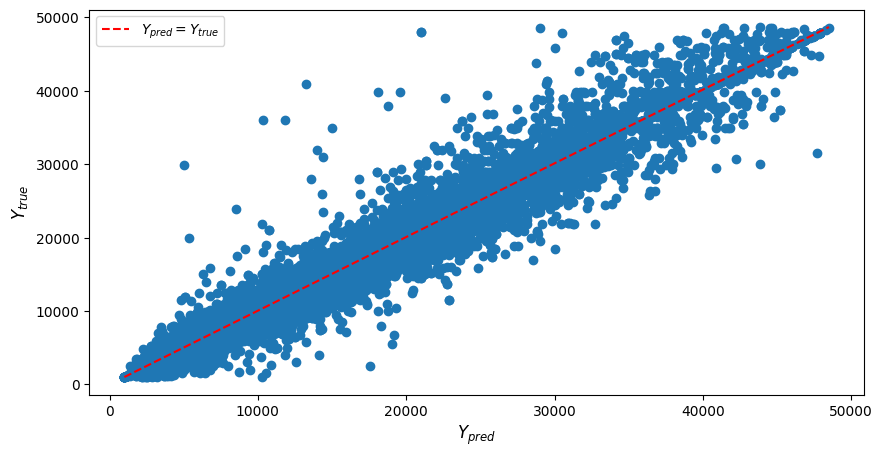

In [97]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(rf_predictions, y_test)
ax.plot([min(rf_predictions), max(rf_predictions)],
        [min(y_test), max(y_test)], "--", c='red', 
        label = "$Y_{pred} = Y_{true}$")
ax.set_xlabel("$Y_{pred}$", fontsize = 12)
ax.set_ylabel("$Y_{true}$", fontsize = 12)
plt.legend()
plt.show()

Some values are clearly, and completely, mis-interpreted by the model. For additional information look at the final remarks section.

##### Learning curves

With the following snippet, I will plot the learning curves of the model for both train and test sets.

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   

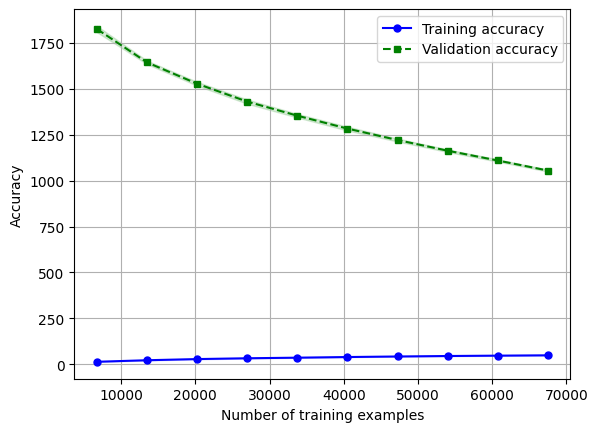

In [98]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=rf_pipeline,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   scoring="neg_mean_absolute_error",
                   cv=5,
                   verbose=0,
                   n_jobs=8)
                   
train_scores = -1 * train_scores  # negate the scores to get mean squared error
test_scores = -1 * test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')

plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

The above plot is not so easy to interpret. I find quite strange that the training curve does not increase to much. This, could probably be the direct cause of not so many data used to train the model but, In the various tests done, I have also used a way bigger dataset (around 120 thousand samples if I remember well), that made the model perform poorer...</br>
Probably, I would have only needed better quality data, with some key informations that could have peermitted to develop different features by means of true relations between parts of the engine, cv, RPM (one of the missing features), and so on. </br>

Despite this, the model seems to have an high variance, which may have led to overfitting. This problem could be resolved with additional <b>good quality</b> data.

## Final remarks and conclusions

This was the final model for the project.</br>
After many (a lot of) tests, the performances of the model are the one displayed above. I have tried many different models and the one that came out to fit better the problem was the Random Forest, with all the hyperparameters defined above. I have excluded things out of the scope of the general course, like neural networks, with which I could have probably reached a way better performance.</br>

For what concerns the ability in predicting the final price of a car, my final model performs quite accurately. It has a MAE of 949.78.</br>
Unfortunately, some values are completely mis-predicted by the model, this is probably due to specific and particular characteristics of these "strange" cars. An example, that comes to my mind, is the one with the Lancia Delta of 1994, which is a particularly high valuable car, even though its characteristics (like engine, cv...) are not so different from the mean of other low value cars.

-------

----------

----------

----------

# <span style="color:red">The following parts do not need to be considered. Are just some tests performed before.</span>

----------

----------

----------

### Gradient Boosting Regressor - Test

In [89]:
gbr_pipeline.fit(X_train, y_train)

gbr_predictions = gbr_pipeline.predict(X_test)
print((gbr_predictions[:10]).astype(int))
print(y_test.values[:10])

      Iter       Train Loss      OOB Improve   Remaining Time 
         1    69016119.9047    14536073.6203            1.14m
         2    55917833.3448    11950245.8691            1.13m
         3    45224758.5104    10207422.9651            1.17m
         4    36723400.4471     8130378.3636            1.17m
         5    29785256.5289     6448220.7098            1.16m
         6    24156843.1826     5289823.5118            1.16m
         7    19595788.2023     4253694.9702            1.17m
         8    15910067.9163     3495579.1173            1.16m
         9    12931478.2348     2757122.1477            1.16m
        10    10505729.4210     2200051.4672            1.16m
        11     8515081.0325     1871701.4559            1.15m
        12     6921775.4815     1502770.5196            1.14m
        13     5632840.0431     1216932.3721            1.14m
        14     4587104.3347      967386.0966            1.13m
        15     3731822.5327      801297.2293            1.13m
       

In [90]:
gbr_mae = mae(gbr_predictions, y_test)
gbr_mse = mse(gbr_predictions, y_test)
gbr_mape = mape(gbr_predictions, y_test)
print('MAE: ', gbr_mae)
print('MSE: ', gbr_mse)
print('MAPE: ', round(gbr_mape*100, 2), "%")

pr = list()
for el in gbr_predictions:
    pr.append((el).astype(int))
re = list()
for el in y_test:
    re.append(el)

MAE:  995.7673655061686
MSE:  3782407.3703456344
MAPE:  7.71 %


In [91]:
prediction_df = pd.DataFrame({'Predicted': pr, 'Real': re})
prediction_df['MAE'] = np.abs(prediction_df['Predicted'] - prediction_df['Real'])
prediction_df.describe()

Predicted          Real           MAE
count  22912.000000  22912.000000  22912.000000
mean   15860.265581  15807.623909    995.929382
std     9002.168706   9232.012807   1670.507948
min     1499.000000   1500.000000      0.000000
25%     8793.750000   8500.000000      1.000000
50%    14499.000000  14500.000000    332.000000
75%    21650.500000  21700.000000   1371.000000
max    43900.000000  43900.000000  27567.000000

In [92]:
prediction_df[prediction_df['MAE'] > 20000]

Predicted   Real    MAE
130        17206  40500  23294
2016       19413  43000  23587
4369       19413  43000  23587
7055       17339  43900  26561
11199       7030  29900  22870
13545      16822  40500  23678
17808      11642  35000  23358
20068      16033  43600  27567
20586      15570  37000  21430

In [93]:
def error_percentage_on_range(mae, df=df):
    price_range = df['price'].max() - df['price'].min()
    print("Price range: {}".format(price_range))
    error_percentage = round(mae/price_range*100, 2)
    print("Error percentage on range: {}%".format(error_percentage))
error_percentage_on_range(gbr_mae)

Price range: 42400
Error percentage on range: 2.35%


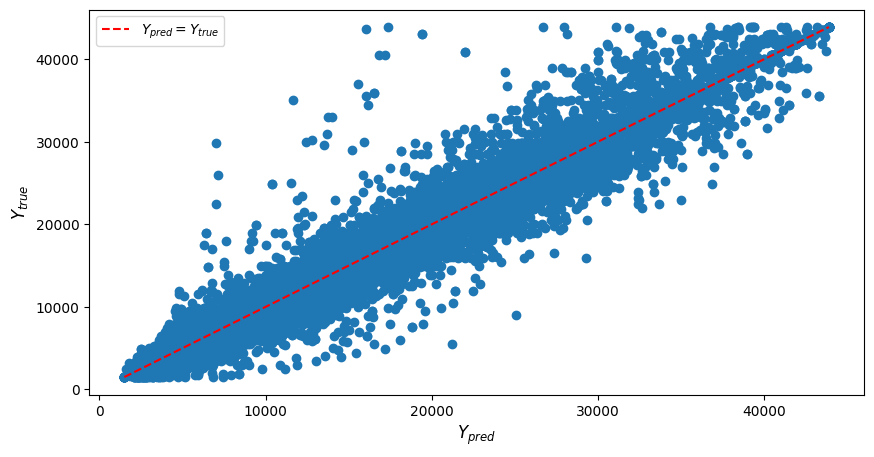

In [94]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(gbr_predictions, y_test)
ax.plot([min(gbr_predictions), max(gbr_predictions)],
        [min(y_test), max(y_test)], "--", c='red', 
        label = "$Y_{pred} = Y_{true}$")
ax.set_xlabel("$Y_{pred}$", fontsize = 12)
ax.set_ylabel("$Y_{true}$", fontsize = 12)
plt.legend()
plt.show()

In [95]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=gbr_pipeline,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   scoring="neg_mean_absolute_error",
                   cv=5,
                   verbose=0,
                   n_jobs=8)
                   
train_scores = -1 * train_scores  # negate the scores to get mean squared error
test_scores = -1 * test_scores

      Iter       Train Loss      OOB Improve   Remaining Time 
         1    66942624.6268    12374370.9784            7.47s
      Iter       Train Loss      OOB Improve   Remaining Time 
         2    54293311.8091    10006541.9680            7.05s
         1    68435885.6065    14281178.4765           13.99s
      Iter       Train Loss      OOB Improve   Remaining Time 
         3    43734970.4538     8793041.3808           10.84s
         2    55521285.6180    11117515.5925           13.76s
         4    35376890.7813     8268549.4679            9.98s
         5    29024280.3520     5315675.9571            9.03s
         3    44855635.5113     9189979.8329           13.97s
         6    23477538.8946     4780709.4731            9.27s
         7    19142261.6055     3282488.2410            9.15s
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1    68864699.3648    14323217.0214           47.70s
   

In [100]:
train_scores

array([[19.19806321, 18.73811477, 18.73811477, 18.73811477, 18.73811477],
       [25.93031798, 31.70832165, 31.70832165, 31.70832165, 31.70832165],
       [32.26695796, 34.60267885, 37.36703195, 37.36703195, 37.36703195],
       [38.45533529, 39.30722707, 43.24559756, 43.24559756, 43.24559756],
       [42.39068974, 43.54550274, 44.7672709 , 44.7672709 , 44.7672709 ],
       [45.82802596, 46.81184396, 46.33887091, 47.63368653, 47.63368653],
       [48.01538316, 49.03855368, 49.25492694, 50.13859441, 50.13859441],
       [50.97035085, 52.43949099, 51.93151183, 52.80527195, 52.57684063],
       [53.92860743, 55.38323828, 55.11910916, 55.7655836 , 54.93255848],
       [56.28017481, 57.68851109, 57.26317482, 58.12155515, 56.43444215]])

In [96]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

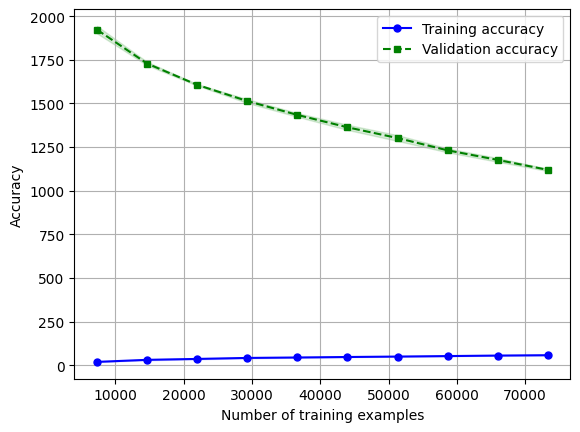

In [97]:
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')

plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

---------

### Other tests with GridSearch CV  

In [22]:
gbr = GradientBoostingRegressor(verbose=0, random_state=42)
gbr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', gbr)])

param_grid = {
    'classifier__learning_rate': [0.03, 0.1, 0.3, 0.01],
    'classifier__n_estimators': [400, 450, 500],
    'classifier__max_depth': [10, 12, 15, 17, 18, 20],
    'classifier__min_samples_split': [2, 4, 6],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'log2'],
    'classifier__alpha': [0.8, 0.9, 1.0],
    'classifier__loss': ['huber']
}

rs = RandomizedSearchCV(gbr_pipeline, param_grid, cv=10, n_jobs=6, verbose=3)

In [23]:
rs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END classifier__alpha=1.0, classifier__learning_rate=0.1, classifier__loss=huber, classifier__max_depth=12, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=4, classifier__n_estimators=450;, score=nan total time=   0.0s
[CV 2/10] END classifier__alpha=1.0, classifier__learning_rate=0.1, classifier__loss=huber, classifier__max_depth=12, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=4, classifier__n_estimators=450;, score=nan total time=   0.1s
[CV 3/10] END classifier__alpha=1.0, classifier__learning_rate=0.1, classifier__loss=huber, classifier__max_depth=12, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=4, classifier__n_estimators=450;, score=nan total time=   0.1s
[CV 5/10] END classifier__alpha=1.0, classifier__learning_rate=0.1, classifier__loss=huber, classifier__max_depth=1

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('StandardScaler',
                                                                                                MinMaxScaler())]),
                                                                               ['MatriculationYear',
                                                                                'km',
                                                                                'cv',
                                                                                'Consume',
                                                                                'Engine',
                                                                                'Emissions',
                                                                                'EmissionClass']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('OneHotEncoder',
                                                                                                OneHotEncoder(categories=[['Diesel',
                                                                                                                           'Benzina',
                                                                                                                           'Other'],
                                                                                                                          ['F...
                   n_jobs=6,
                   param_distributions={'classifier__alpha': [0.8, 0.9, 1.0],
                                        'classifier__learning_rate': [0.03, 0.1,
                                                                      0.3,
                                                                      0.01],
                                        'classifier__loss': ['huber'],
                                        'classifier__max_depth': [10, 12, 15,
                                                                  17, 18, 20],
                                        'classifier__max_features': [None,
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 4,
                                                                          6],
                                        'classifier__n_estimators': [400, 450,
                                                                     500]},
                   verbose=3)

In [24]:
result = pd.DataFrame(rs.cv_results_)
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.074347      0.030790         0.000000        0.000000   
1     241.921571      9.814737         0.202696        0.025513   
2    1029.382422     18.697041         0.701421        0.042343   
3       0.050567      0.007504         0.000000        0.000000   
4     200.856834      2.785920         0.188200        0.015814   
5     523.344794     16.410278         0.467495        0.030427   
6     237.959964      3.102134         0.211769        0.018817   
7       0.047012      0.011610         0.000000        0.000000   
8       0.045697      0.010670         0.000000        0.000000   
9      91.104402      6.709674         0.234110        0.059559   

  param_classifier__n_estimators param_classifier__min_samples_split  \
0                            450                                   4   
1                            450                                   6   
2                            400                                   2   
3                            450                                   4   
4                            450                                   4   
5                            500                                   2   
6                            400                                   6   
7                            450                                   4   
8                            450                                   2   
9                            400                                   6   

  param_classifier__min_samples_leaf param_classifier__max_features  \
0                                  1                           None   
1                                  2                           None   
2                                  1                           None   
3                                  4                           None   
4                                  2                           None   
5                                  4                           None   
6                                  2                           None   
7                                  2                           log2   
8                                  4                           log2   
9                                  1                           log2   

  param_classifier__max_depth param_classifier__loss  ... split3_test_score  \
0                          12                  huber  ...               NaN   
1                          12                  huber  ...          0.900486   
2                          20                  huber  ...          0.928547   
3                          20                  huber  ...               NaN   
4                          10                  huber  ...          0.905398   
5                          20                  huber  ...          0.887409   
6                          12                  huber  ...          0.901540   
7                          17                  huber  ...               NaN   
8                          10                  huber  ...               NaN   
9                          10                  huber  ...          0.913757   

  split4_test_score split5_test_score  split6_test_score  split7_test_score  \
0               NaN               NaN                NaN                NaN   
1          0.912629          0.923602           0.912587           0.933002   
2          0.920737          0.887972           0.929656           0.940610   
3               NaN               NaN                NaN                NaN   
4          0.922700          0.918228           0.886564           0.922745   
5          0.916829          0.905052           0.882439           0.903899   
6          0.916668          0.901679           0.888093           0.932423   
7               NaN               NaN                NaN                NaN   
8               NaN               NaN                NaN                NaN   
9          0.896493          0

In [25]:
best_model = rs.best_estimator_

In [26]:
from pprint import pprint
import ast

a = result.sort_values("rank_test_score")
# select rows where column A equals x
selected_rows = a[a['rank_test_score'] == 1]

# select values of column B for selected rows
selected_values = selected_rows['params'].iloc[0]

print(selected_values)

{'classifier__n_estimators': 400, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__loss': 'huber', 'classifier__learning_rate': 0.1, 'classifier__alpha': 0.8}


In [27]:
gbr_predictions = best_model.predict(X_test)
print(gbr_predictions[:5])
print(y_test.values[:5])

gbr_mae = mae(gbr_predictions, y_test)
gbr_mse = mse(gbr_predictions, y_test)
print('MAE: ', gbr_mae)
print('MSE: ', gbr_mse)

def error_percentage_on_range(mae, df=df):
    price_range = df['price'].max() - df['price'].min()
    print("Price range: {}".format(price_range))
    error_percentage = round(mae/price_range*100, 2)
    print("Error percentage: {}%".format(error_percentage))
error_percentage_on_range(gbr_mae)

[ 2758.99408421 23999.97994351  3444.03324047 12793.86267919
  5897.81441434]
[ 2900 24000  3200 15500  5900]
MAE:  1278.4317652404839
MSE:  17657618.736336842
Price range: 449700
Error percentage: 0.28%


----------